# Higgs Boson Machine Learning Challenge


In [1]:
!pip install dabl 

     |████████████████████████████████| 558 kB 4.2 MB/s 
     |████████████████████████████████| 23.1 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from collections import Counter

from sklearn.metrics import accuracy_score


In [3]:
# read csv file
df = pd.read_csv("/content/drive/MyDrive/Higgs Boson/Dataset/training.csv")
df.head()

EventId  DER_mass_MMC  ...    Weight  Label
0   100000       138.470  ...  0.002653      s
1   100001       160.937  ...  2.233584      b
2   100002      -999.000  ...  2.347389      b
3   100003       143.905  ...  5.446378      b
4   100004       175.864  ...  6.245333      b

[5 rows x 33 columns]

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [5]:
# columns 
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [6]:
# describe data
df.describe()

EventId   DER_mass_MMC  ...  PRI_jet_all_pt         Weight
count  250000.000000  250000.000000  ...   250000.000000  250000.000000
mean   224999.500000     -49.023079  ...       73.064591       1.646767
std     72168.927986     406.345647  ...       98.015662       1.875103
min    100000.000000    -999.000000  ...        0.000000       0.001502
25%    162499.750000      78.100750  ...        0.000000       0.018636
50%    224999.500000     105.012000  ...       40.512500       1.156188
75%    287499.250000     130.606250  ...      109.933750       2.404128
max    349999.000000    1192.026000  ...     1633.433000       7.822543

[8 rows x 32 columns]

In [7]:
# type of data
df.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

In [8]:
# value counts for label columns
df["Label"].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [9]:
print("="*100)
print("The Percentage of Background are: ",(df["Label"].value_counts()[0]*100)/df["Label"].count(),"%")
print("="*100)
print("The Percentage of Signal are: ",(df["Label"].value_counts()[1]*100)/df["Label"].count(),"%")
print("="*100)

The Percentage of Background are:  65.7332 %
The Percentage of Signal are:  34.2668 %


In [10]:
# missing values
df.isna().sum() 

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [11]:
# duplicated values
df[df.duplicated()].count()
df.drop_duplicates(keep=False,inplace=True) 
df.shape

(250000, 33)

In [12]:
# replace -999.000 to nan values
df = df.replace(-999.000,np.nan)

In [13]:
# drop nan values
df.dropna(axis=0,inplace=True)

In [14]:
df.shape

(68114, 33)

# EDA and Data Preprocessing

# Outliers

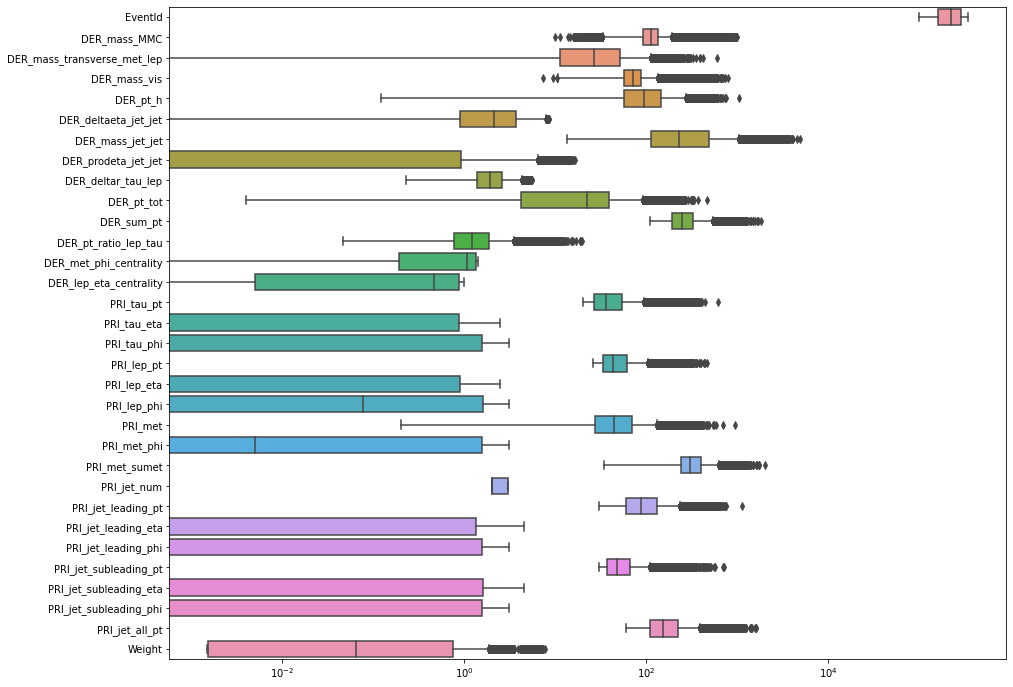

In [15]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df, orient='h');
plt.xscale('log')

# Label

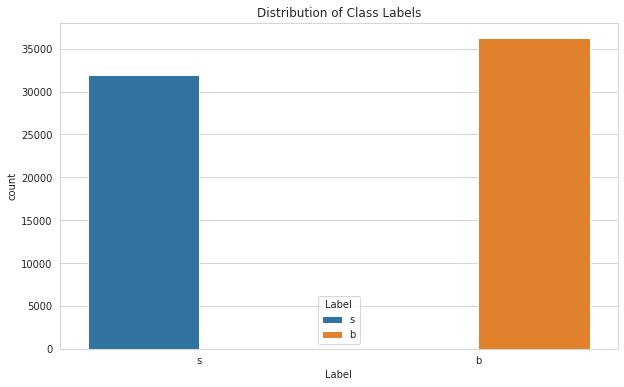

In [16]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid") 
sns.countplot(x ="Label", data = df, hue="Label")
plt.title("Distribution of Class Labels")
plt.show() 

# DER_mass_MMC

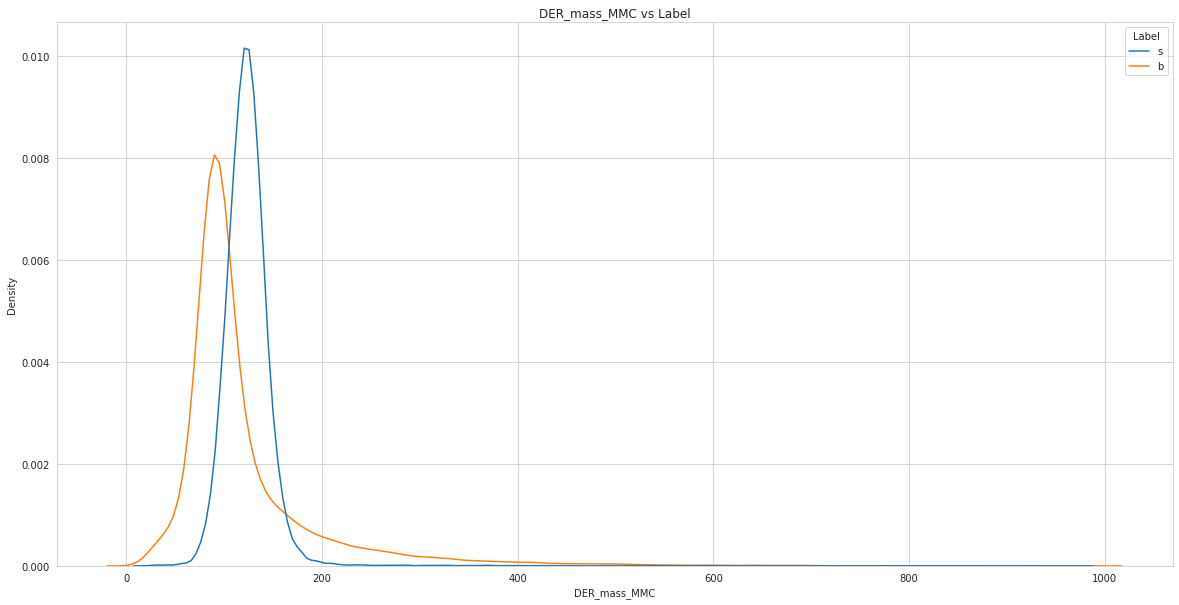

In [17]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_mass_MMC"],hue=df["Label"],color="G")
plt.title("DER_mass_MMC vs Label")
plt.show()

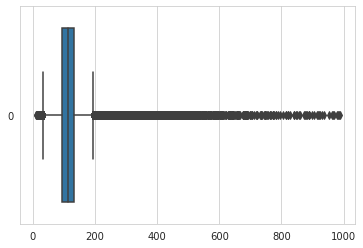

In [18]:
sns.boxplot(data=df['DER_mass_MMC'],orient='h');

In [19]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_mass_MMC"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_mass_MMC"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_mass_MMC"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_mass_MMC"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_mass_MMC"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_mass_MMC"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_mass_MMC"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_mass_MMC"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  9.878
The 25 percentile values is:  93.32024999999999
The 50 percentile values is:  113.23
The 75 percentile values is:  133.45575000000002
The 90 percentile values is:  161.19930000000005
The 99 percentile values is:  390.56823999999887
The 99.1 percentile values is:  406.16085799999917
The 99.2 percentile values is:  418.3724640000018
The 99.3 percentile values is:  434.5031950000009
The 99.4 percentile values is:  457.17765600000007
The 99.5 percentile values is:  478.54861999999804
The 99.6 percentile values is:  503.9258439999993
The 99.7 percentile values is:  538.128878999999
The 99.8 percentile values is:  596.7731400000005
The 99.9 percentile values is:  690.5866130000012
The 100 percentile values is:  988.199
****************************************************************************************************


In [20]:
df = df[(df['DER_mass_MMC'] < 690.5866130000012) & (df['DER_mass_MMC'] > 9.878)]
df.shape

(68044, 33)

# DER_mass_transverse_met_lep

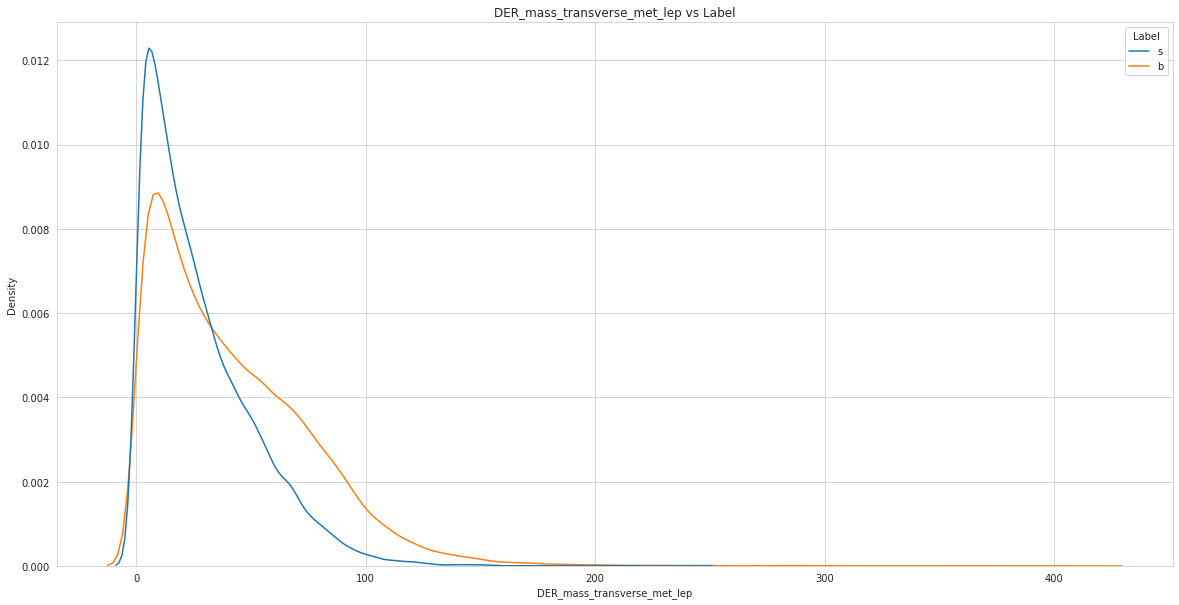

In [21]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_mass_transverse_met_lep"],hue=df["Label"],color="G")
plt.title("DER_mass_transverse_met_lep vs Label")
plt.show()

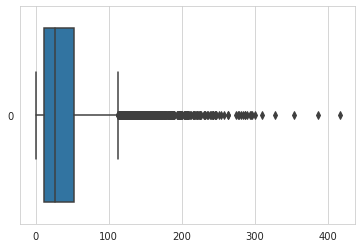

In [22]:
sns.boxplot(data=df['DER_mass_transverse_met_lep'],orient='h')

In [23]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_mass_transverse_met_lep"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.0
The 25 percentile values is:  11.31075
The 50 percentile values is:  26.941
The 75 percentile values is:  52.14725
The 90 percentile values is:  77.4364
The 99 percentile values is:  129.78908999999973
The 99.1 percentile values is:  132.40713
The 99.2 percentile values is:  135.47279200000023
The 99.3 percentile values is:  139.29968899999994
The 99.4 percentile values is:  142.5990080000016
The 99.5 percentile values is:  147.5196100000005
The 99.6 percentile values is:  152.15108799999973
The 99.7 percentile values is:  162.30665099999987
The 99.8 percentile values is:  175.370656
The 99.9 percentile values is:  202.6271140000151
The 100 percentile values is:  417.028
****************************************************************************************************


In [24]:
# outliers remove at 100th percentile
df = df[(df['DER_mass_transverse_met_lep'] < 205.95724300000242) & (df['DER_mass_transverse_met_lep'] > 0.0)]
df.shape

(67978, 33)

# DER_mass_vis

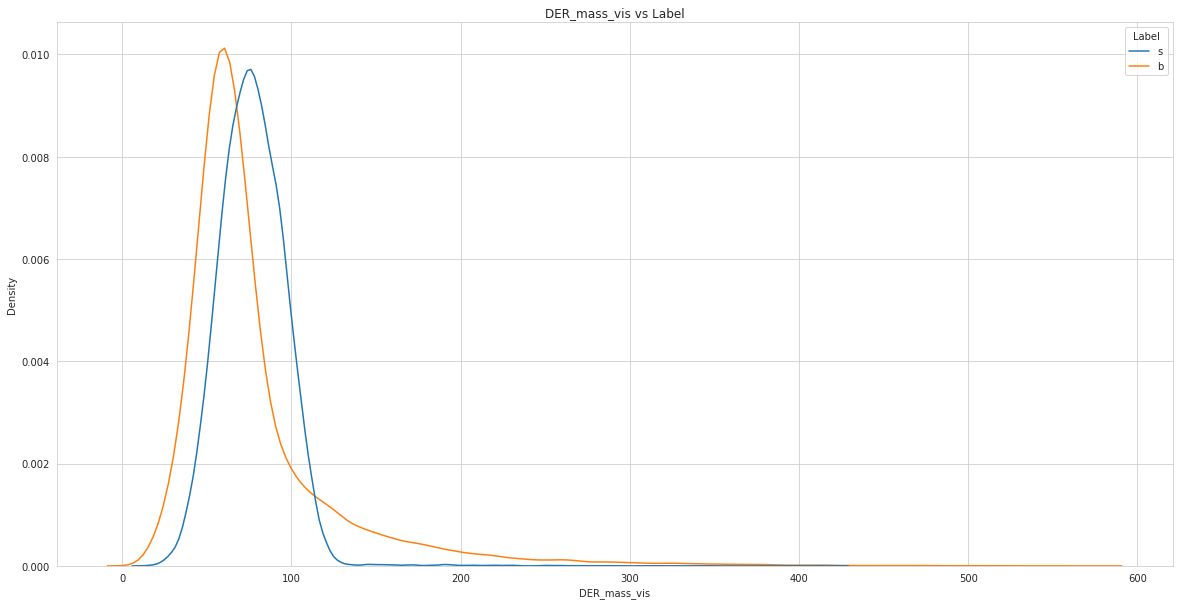

In [25]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_mass_vis"],hue=df["Label"],color="G")
plt.title("DER_mass_vis vs Label")
plt.show()

In [26]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_mass_vis"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_mass_vis"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_mass_vis"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_mass_vis"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_mass_vis"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_mass_vis"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_mass_vis"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_mass_vis"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_mass_vis"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_mass_vis"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_mass_vis"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_mass_vis"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_mass_vis"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_mass_vis"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_mass_vis"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_mass_vis"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  9.463
The 25 percentile values is:  57.25325
The 50 percentile values is:  70.8835
The 75 percentile values is:  88.244
The 90 percentile values is:  108.6893
The 99 percentile values is:  246.6715199999999
The 99.1 percentile values is:  254.7274519999998
The 99.2 percentile values is:  262.4749359999997
The 99.3 percentile values is:  271.437378999999
The 99.4 percentile values is:  284.5562480000006
The 99.5 percentile values is:  297.25093000000203
The 99.6 percentile values is:  313.4317800000009
The 99.7 percentile values is:  333.4319370000006
The 99.8 percentile values is:  359.2440480000002
The 99.9 percentile values is:  399.7737720000001
The 100 percentile values is:  572.547
****************************************************************************************************


In [27]:
# outliers remove at 100th percentile
df = df[(df['DER_mass_vis'] < 434.84209100000226) & (df['DER_mass_vis'] > 7.33)]
df.shape

(67943, 33)

# DER_pt_h

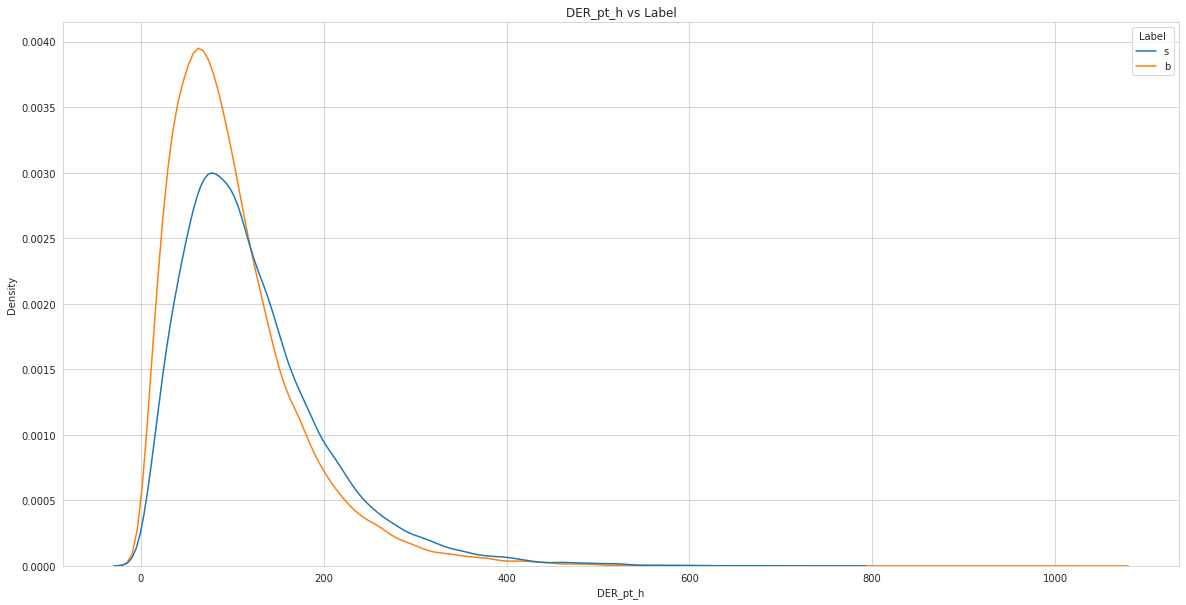

In [28]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_pt_h"],hue=df["Label"],color="G")
plt.title("DER_pt_h vs Label")
plt.show()

In [29]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_pt_h"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_pt_h"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_pt_h"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_pt_h"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_pt_h"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_pt_h"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_pt_h"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_pt_h"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_pt_h"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_pt_h"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_pt_h"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_pt_h"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_pt_h"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_pt_h"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_pt_h"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_pt_h"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.12
The 25 percentile values is:  57.7875
The 50 percentile values is:  94.635
The 75 percentile values is:  145.73250000000002
The 90 percentile values is:  209.8278
The 99 percentile values is:  374.5862000000002
The 99.1 percentile values is:  380.9397919999999
The 99.2 percentile values is:  389.7845199999996
The 99.3 percentile values is:  399.490248
The 99.4 percentile values is:  409.5489200000005
The 99.5 percentile values is:  421.36551999999944
The 99.6 percentile values is:  435.758800000001
The 99.7 percentile values is:  458.81656799999996
The 99.8 percentile values is:  483.83171999999905
The 99.9 percentile values is:  519.7508720000004
The 100 percentile values is:  1053.807
****************************************************************************************************


In [30]:
# outliers remove at 100th percentile
df = df[(df['DER_pt_h'] < 519.6393280000023) & (df['DER_pt_h'] > 0.12)]
df.shape

(67873, 33)

# DER_deltaeta_jet_jet

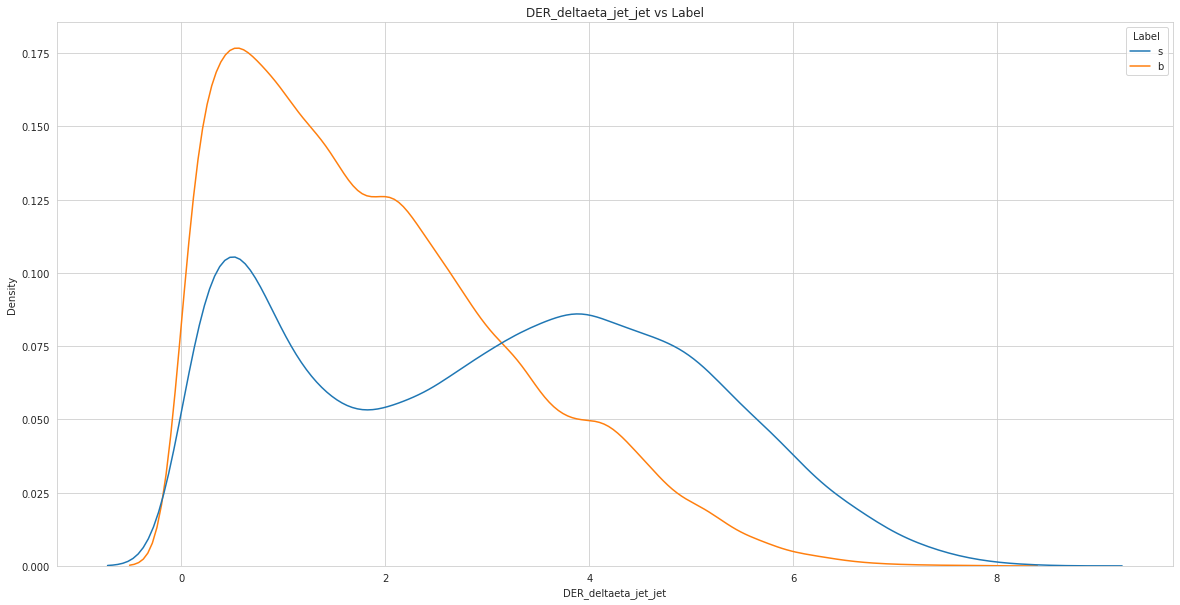

In [31]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_deltaeta_jet_jet"],hue=df["Label"],color="G")
plt.title("DER_deltaeta_jet_jet vs Label")
plt.show()

In [32]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_deltaeta_jet_jet"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.0
The 25 percentile values is:  0.898
The 50 percentile values is:  2.148
The 75 percentile values is:  3.745
The 90 percentile values is:  4.973
The 99 percentile values is:  6.683279999999999
The 99.1 percentile values is:  6.736152000000002
The 99.2 percentile values is:  6.800024000000005
The 99.3 percentile values is:  6.865895999999994
The 99.4 percentile values is:  6.936
The 99.5 percentile values is:  7.027639999999999
The 99.6 percentile values is:  7.128024000000005
The 99.7 percentile values is:  7.255152000000017
The 99.8 percentile values is:  7.402511999999988
The 99.9 percentile values is:  7.636
The 100 percentile values is:  8.503
****************************************************************************************************


In [33]:
# outliers remove at 100th percentile
df = df[(df['DER_deltaeta_jet_jet'] < 7.635435000000013) & (df['DER_deltaeta_jet_jet'] > 0.0)]
df.shape

(67799, 33)

# DER_mass_jet_jet

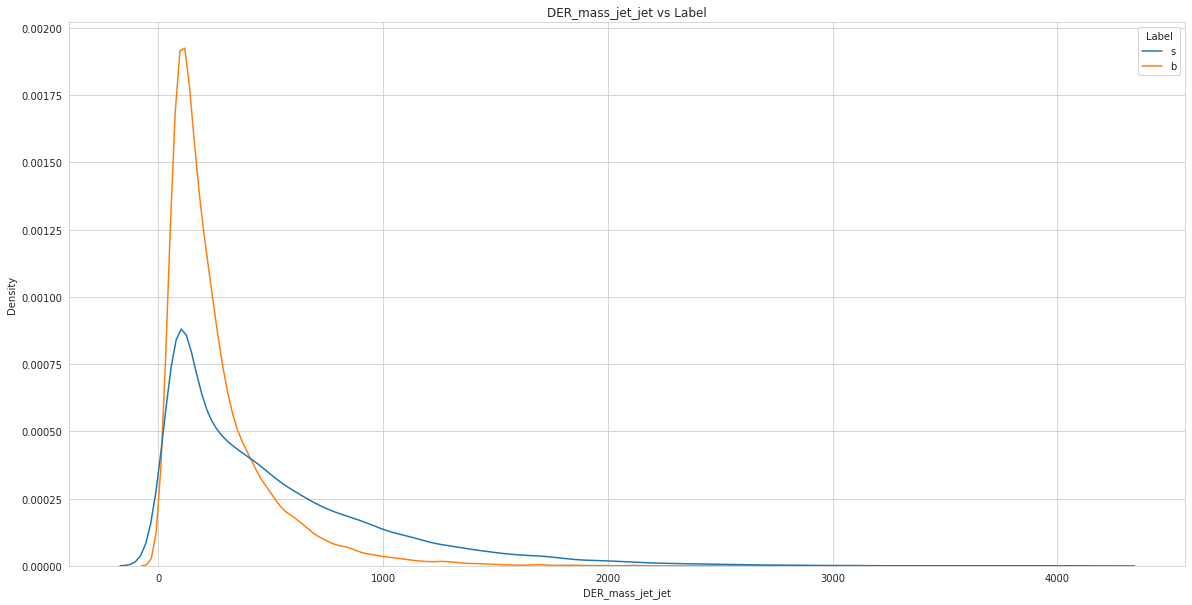

In [34]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_mass_jet_jet"],hue=df["Label"],color="G")
plt.title("DER_mass_jet_jet vs Label")
plt.show()

In [35]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_mass_jet_jet"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  13.602
The 25 percentile values is:  113.27100000000002
The 50 percentile values is:  231.898
The 75 percentile values is:  488.345
The 90 percentile values is:  879.1716000000001
The 99 percentile values is:  1900.2708000000002
The 99.1 percentile values is:  1946.7793019999995
The 99.2 percentile values is:  1991.0771839999977
The 99.3 percentile values is:  2040.4756680000023
The 99.4 percentile values is:  2102.431736000006
The 99.5 percentile values is:  2177.1405999999956
The 99.6 percentile values is:  2266.4184560000044
The 99.7 percentile values is:  2391.674213999999
The 99.8 percentile values is:  2548.915883999992
The 99.9 percentile values is:  2799.1401940000046
The 100 percentile values is:  4160.527
****************************************************************************************************


In [36]:
# outliers remove at 100th percentile
df = df[(df['DER_mass_jet_jet'] < 2799.1401940000046) & (df['DER_mass_jet_jet'] > 13.602)]
df.shape

(67730, 33)

# DER_prodeta_jet_jet

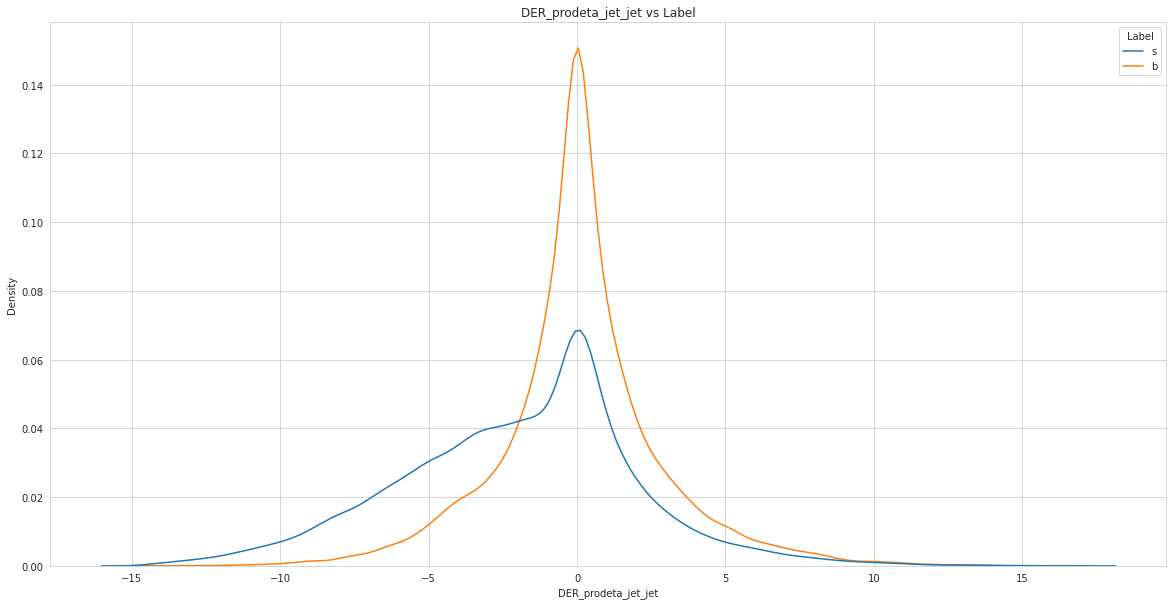

In [37]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_prodeta_jet_jet"],hue=df["Label"],color="G")
plt.title("DER_prodeta_jet_jet vs Label")
plt.show()

In [38]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_prodeta_jet_jet"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -14.530999999999999
The 25 percentile values is:  -2.7119999999999997
The 50 percentile values is:  -0.28
The 75 percentile values is:  0.925
The 90 percentile values is:  3.003
The 99 percentile values is:  8.206710000000006
The 99.1 percentile values is:  8.386633999999992
The 99.2 percentile values is:  8.62067200000002
The 99.3 percentile values is:  8.877793999999994
The 99.4 percentile values is:  9.217
The 99.5 percentile values is:  9.630679999999934
The 99.6 percentile values is:  10.052999999999999
The 99.7 percentile values is:  10.504259999999892
The 99.8 percentile values is:  11.074626000000002
The 99.9 percentile values is:  12.274233000000182
The 100 percentile values is:  16.648
****************************************************************************************************


# DER_deltar_tau_lep

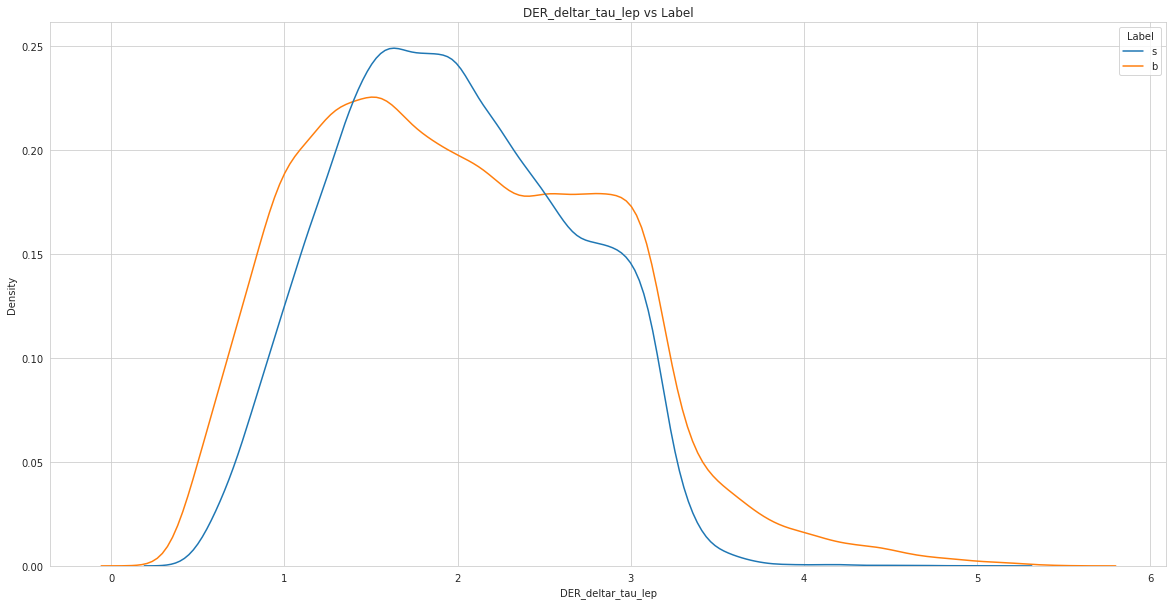

In [39]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_deltar_tau_lep"],hue=df["Label"],color="G")
plt.title("DER_deltar_tau_lep vs Label")
plt.show()

In [40]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_deltar_tau_lep"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.256
The 25 percentile values is:  1.3969999999999998
The 50 percentile values is:  1.939
The 75 percentile values is:  2.571
The 90 percentile values is:  3.0189999999999997
The 99 percentile values is:  3.923710000000006
The 99.1 percentile values is:  3.9794389999999984
The 99.2 percentile values is:  4.038168000000005
The 99.3 percentile values is:  4.104896999999998
The 99.4 percentile values is:  4.185252000000007
The 99.5 percentile values is:  4.27
The 99.6 percentile values is:  4.379252000000007
The 99.7 percentile values is:  4.468999999999999
The 99.8 percentile values is:  4.619084000000003
The 99.9 percentile values is:  4.842
The 100 percentile values is:  5.486000000000001
****************************************************************************************************


In [41]:
# outliers remove at 100th percentile
df = df[(df['DER_deltar_tau_lep'] < 4.8925480000000094) & (df['DER_deltar_tau_lep'] > 0.228)]
df.shape

(67675, 33)

# DER_pt_tot 

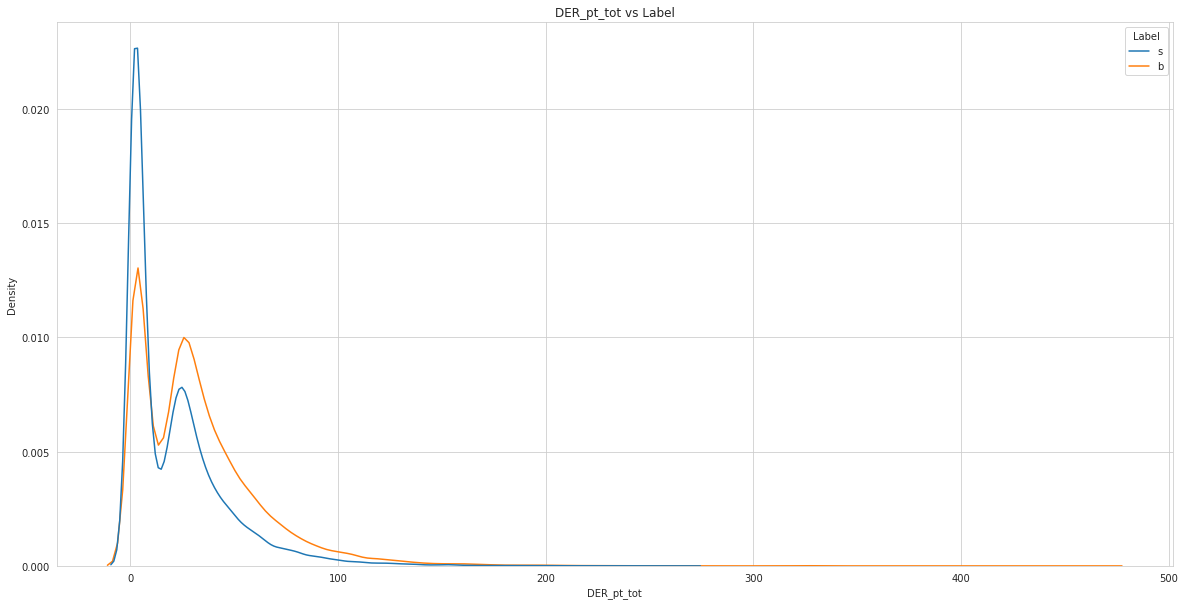

In [42]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_pt_tot"],hue=df["Label"],color="G")
plt.title("DER_pt_tot vs Label")
plt.show()

In [43]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_pt_tot"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_pt_tot"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_pt_tot"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_pt_tot"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_pt_tot"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_pt_tot"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_pt_tot"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_pt_tot"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_pt_tot"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_pt_tot"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_pt_tot"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_pt_tot"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_pt_tot"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_pt_tot"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_pt_tot"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_pt_tot"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.004
The 25 percentile values is:  4.218999999999999
The 50 percentile values is:  22.531999999999996
The 75 percentile values is:  39.0275
The 90 percentile values is:  62.11319999999999
The 99 percentile values is:  126.36611999999968
The 99.1 percentile values is:  129.58135999999976
The 99.2 percentile values is:  132.70761599999875
The 99.3 percentile values is:  137.1350760000001
The 99.4 percentile values is:  142.87661600000132
The 99.5 percentile values is:  149.83713000000023
The 99.6 percentile values is:  156.08847200000005
The 99.7 percentile values is:  164.50773600000002
The 99.8 percentile values is:  179.4590920000004
The 99.9 percentile values is:  202.70422600000012
The 100 percentile values is:  466.525
****************************************************************************************************


In [44]:
# outliers remove at 100th percentile
df = df[(df['DER_pt_tot'] < 202.6959210000012) & (df['DER_pt_tot'] > 0.004)]
df.shape

(67606, 33)

# DER_sum_pt

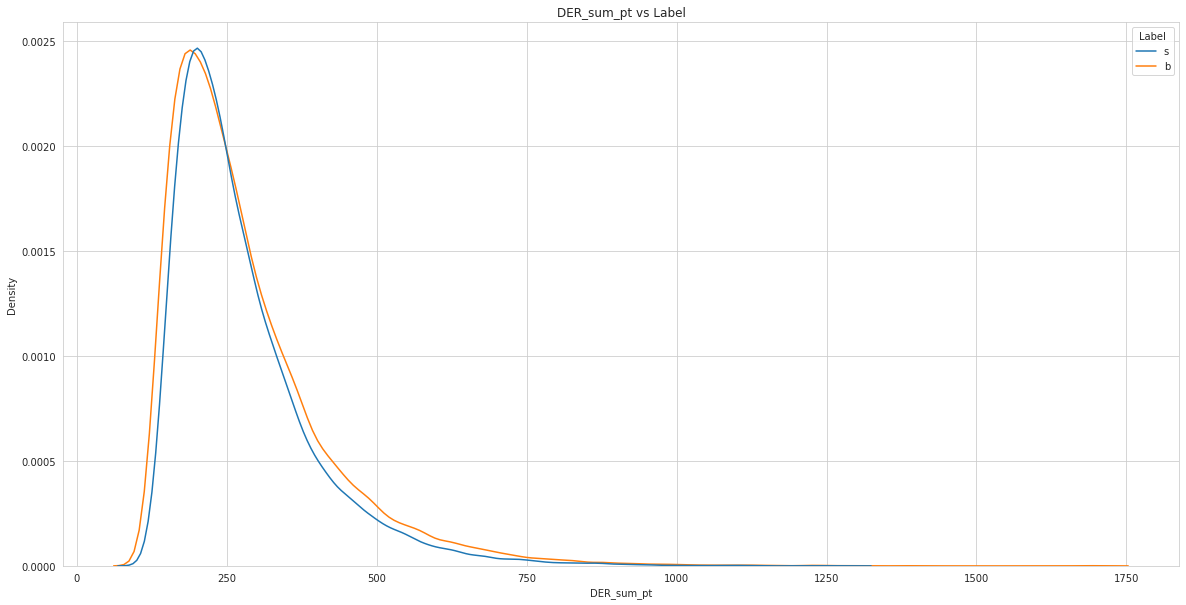

In [45]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_sum_pt"],hue=df["Label"],color="G")
plt.title("DER_sum_pt vs Label")
plt.show()

In [46]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_sum_pt"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_sum_pt"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_sum_pt"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_sum_pt"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_sum_pt"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_sum_pt"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_sum_pt"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_sum_pt"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_sum_pt"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_sum_pt"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_sum_pt"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_sum_pt"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_sum_pt"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_sum_pt"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_sum_pt"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_sum_pt"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  110.601
The 25 percentile values is:  192.71599999999998
The 50 percentile values is:  246.268
The 75 percentile values is:  329.93600000000004
The 90 percentile values is:  441.695
The 99 percentile values is:  732.0967999999998
The 99.1 percentile values is:  743.8167449999996
The 99.2 percentile values is:  760.4834800000003
The 99.3 percentile values is:  778.2607699999998
The 99.4 percentile values is:  797.2561900000088
The 99.5 percentile values is:  821.4691500000064
The 99.6 percentile values is:  847.9759600000008
The 99.7 percentile values is:  880.9984849999996
The 99.8 percentile values is:  930.4642799999959
The 99.9 percentile values is:  1020.7922900000144
The 100 percentile values is:  1703.7520000000002
****************************************************************************************************


In [47]:
# outliers remove at 100th percentile
df = df[(df['DER_sum_pt'] < 1020.5996800000387) & (df['DER_sum_pt'] > 110.601)]
df.shape

(67537, 33)

# DER_pt_ratio_lep_tau

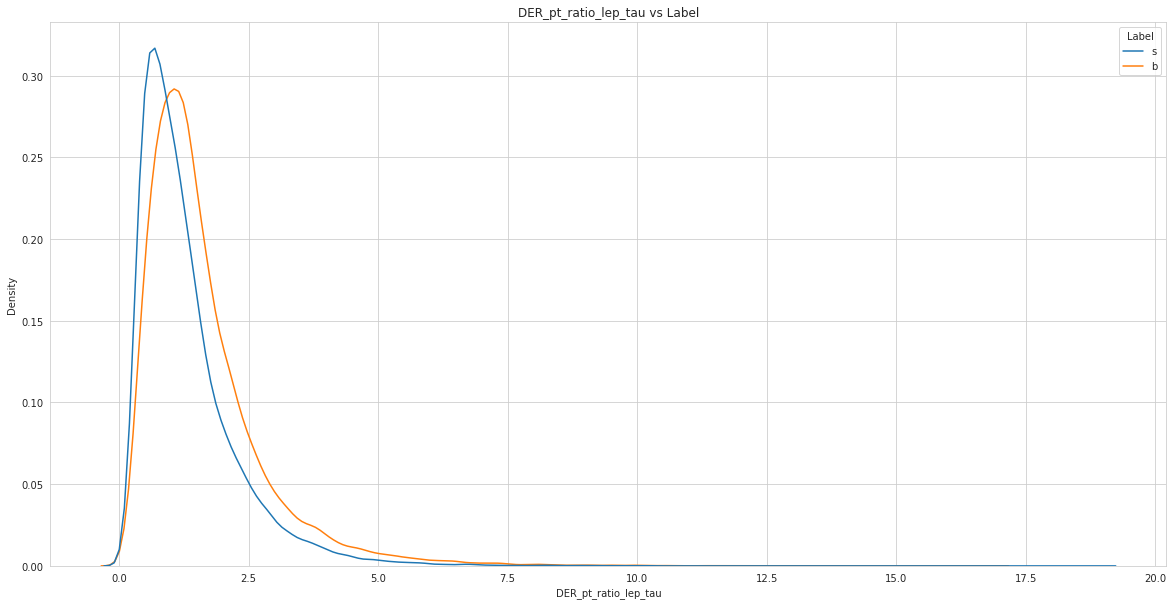

In [48]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_pt_ratio_lep_tau"],hue=df["Label"],color="G")
plt.title("DER_pt_ratio_lep_tau vs Label")
plt.show()

In [49]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_pt_ratio_lep_tau"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.07400000000000001
The 25 percentile values is:  0.763
The 50 percentile values is:  1.205
The 75 percentile values is:  1.85
The 90 percentile values is:  2.753
The 99 percentile values is:  5.491919999999998
The 99.1 percentile values is:  5.6363519999999845
The 99.2 percentile values is:  5.774
The 99.3 percentile values is:  5.966239999999961
The 99.4 percentile values is:  6.196784000000014
The 99.5 percentile values is:  6.452999999999999
The 99.6 percentile values is:  6.760135999999998
The 99.7 percentile values is:  7.168879999999888
The 99.8 percentile values is:  7.836191999999995
The 99.9 percentile values is:  8.848888000000123
The 100 percentile values is:  18.872
****************************************************************************************************


# DER_met_phi_centrality

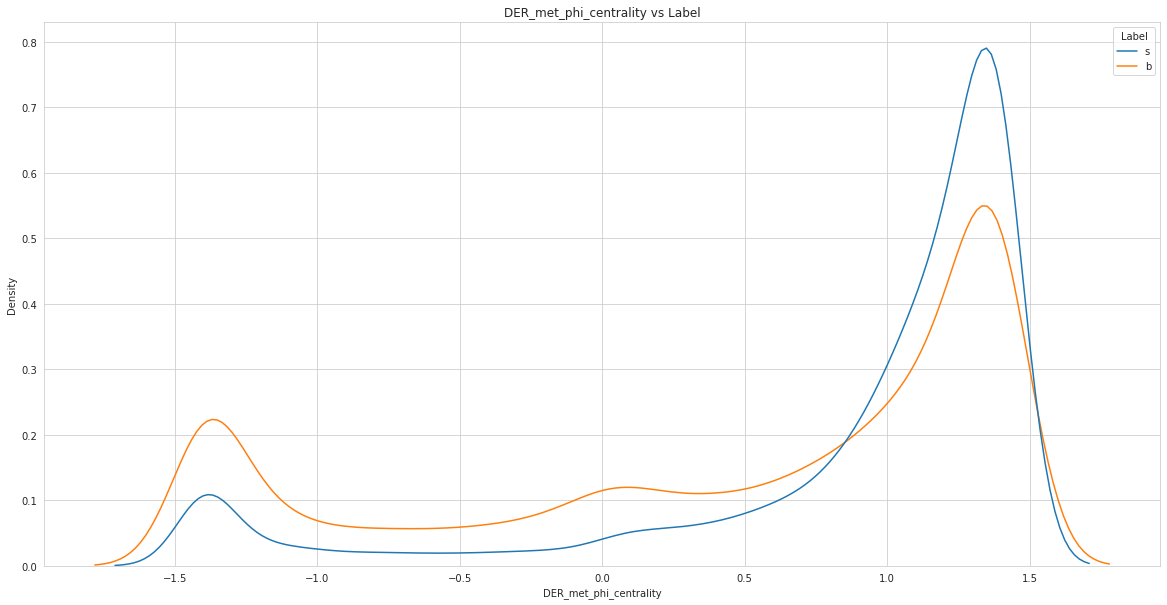

In [50]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_met_phi_centrality"],hue=df["Label"],color="G")
plt.title("DER_met_phi_centrality vs Label")
plt.show()

In [51]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_met_phi_centrality"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -1.4140000000000001
The 25 percentile values is:  0.191
The 50 percentile values is:  1.071
The 75 percentile values is:  1.3419999999999999
The 90 percentile values is:  1.406
The 99 percentile values is:  1.4140000000000001
The 99.1 percentile values is:  1.4140000000000001
The 99.2 percentile values is:  1.4140000000000001
The 99.3 percentile values is:  1.4140000000000001
The 99.4 percentile values is:  1.4140000000000001
The 99.5 percentile values is:  1.4140000000000001
The 99.6 percentile values is:  1.4140000000000001
The 99.7 percentile values is:  1.4140000000000001
The 99.8 percentile values is:  1.4140000000000001
The 99.9 percentile values is:  1.4140000000000001
The 100 percentile values is:  1.4140000000000001
****************************************************************************************************


# DER_lep_eta_centrality

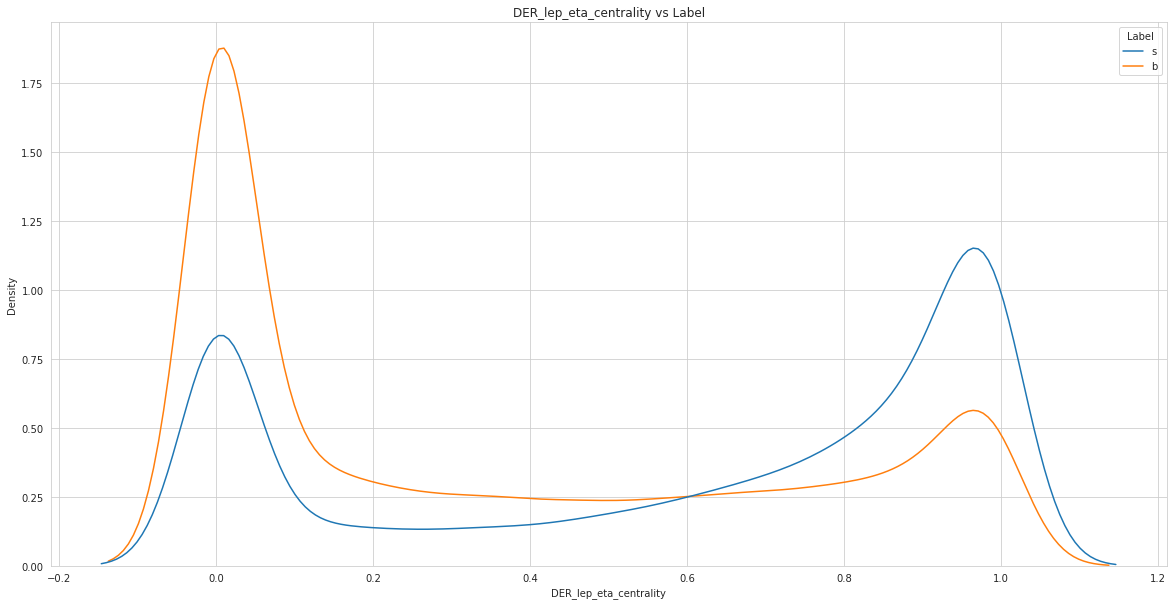

In [52]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["DER_lep_eta_centrality"],hue=df["Label"],color="G")
plt.title("DER_lep_eta_centrality vs Label")
plt.show()

In [53]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],0))
print("The 25 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],25))
print("The 50 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],50))
print("The 75 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],75))
print("The 90 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],90))
print("The 99 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99))
print("The 99.1 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],99.9))
print("The 100 percentile values is: ",np.percentile(df["DER_lep_eta_centrality"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.0
The 25 percentile values is:  0.005
The 50 percentile values is:  0.47
The 75 percentile values is:  0.883
The 90 percentile values is:  0.9830000000000001
The 99 percentile values is:  1.0
The 99.1 percentile values is:  1.0
The 99.2 percentile values is:  1.0
The 99.3 percentile values is:  1.0
The 99.4 percentile values is:  1.0
The 99.5 percentile values is:  1.0
The 99.6 percentile values is:  1.0
The 99.7 percentile values is:  1.0
The 99.8 percentile values is:  1.0
The 99.9 percentile values is:  1.0
The 100 percentile values is:  1.0
****************************************************************************************************


# PRI_tau_pt

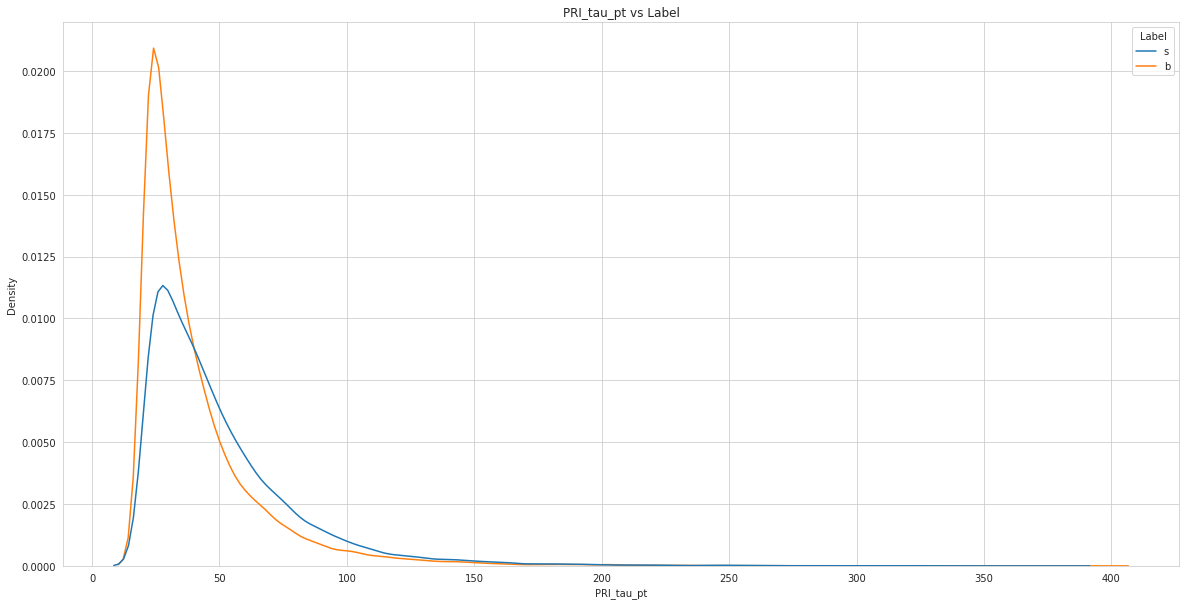

In [54]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_tau_pt"],hue=df["Label"],color="G")
plt.title("PRI_tau_pt vs Label")
plt.show()

In [55]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_tau_pt"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_tau_pt"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_tau_pt"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_tau_pt"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_tau_pt"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_tau_pt"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_tau_pt"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_tau_pt"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  20.0
The 25 percentile values is:  26.572
The 50 percentile values is:  36.537
The 75 percentile values is:  54.037
The 90 percentile values is:  78.65200000000002
The 99 percentile values is:  157.22655999999995
The 99.1 percentile values is:  160.87390399999938
The 99.2 percentile values is:  165.57802399999997
The 99.3 percentile values is:  173.63838399999958
The 99.4 percentile values is:  180.52970400000186
The 99.5 percentile values is:  187.88291999999996
The 99.6 percentile values is:  196.051568
The 99.7 percentile values is:  207.84951999999953
The 99.8 percentile values is:  228.563776
The 99.9 percentile values is:  258.85895200001926
The 100 percentile values is:  396.875
****************************************************************************************************


In [56]:
# outliers remove at 100th percentile
df = df[(df['PRI_tau_pt'] < 277.6462120000012) & (df['PRI_tau_pt'] > 20.0)]
df.shape

(67489, 33)

# PRI_tau_eta

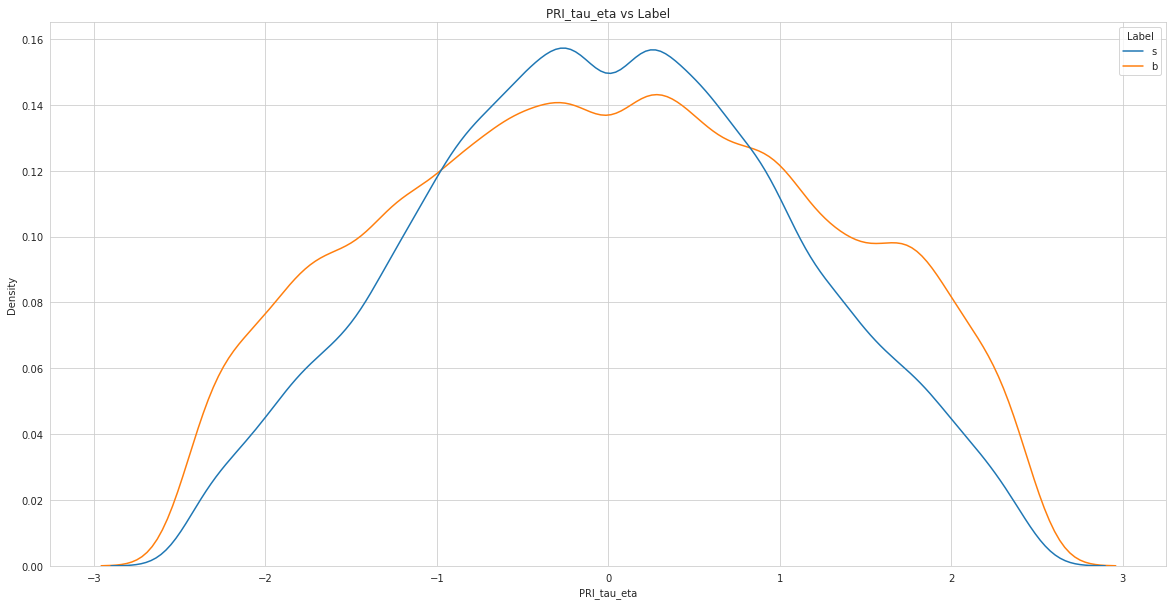

In [57]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_tau_eta"],hue=df["Label"],color="G")
plt.title("PRI_tau_eta vs Label")
plt.show()

In [58]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_tau_eta"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_tau_eta"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_tau_eta"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_tau_eta"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_tau_eta"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_tau_eta"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_tau_eta"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_tau_eta"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -2.496
The 25 percentile values is:  -0.887
The 50 percentile values is:  -0.011000000000000001
The 75 percentile values is:  0.879
The 90 percentile values is:  1.6380000000000001
The 99 percentile values is:  2.3361199999999953
The 99.1 percentile values is:  2.347
The 99.2 percentile values is:  2.3569999999999998
The 99.3 percentile values is:  2.367584000000003
The 99.4 percentile values is:  2.379
The 99.5 percentile values is:  2.3930000000000002
The 99.6 percentile values is:  2.4090000000000003
The 99.7 percentile values is:  2.425
The 99.8 percentile values is:  2.441
The 99.9 percentile values is:  2.4575120000000026
The 100 percentile values is:  2.497
****************************************************************************************************


# PRI_tau_phi

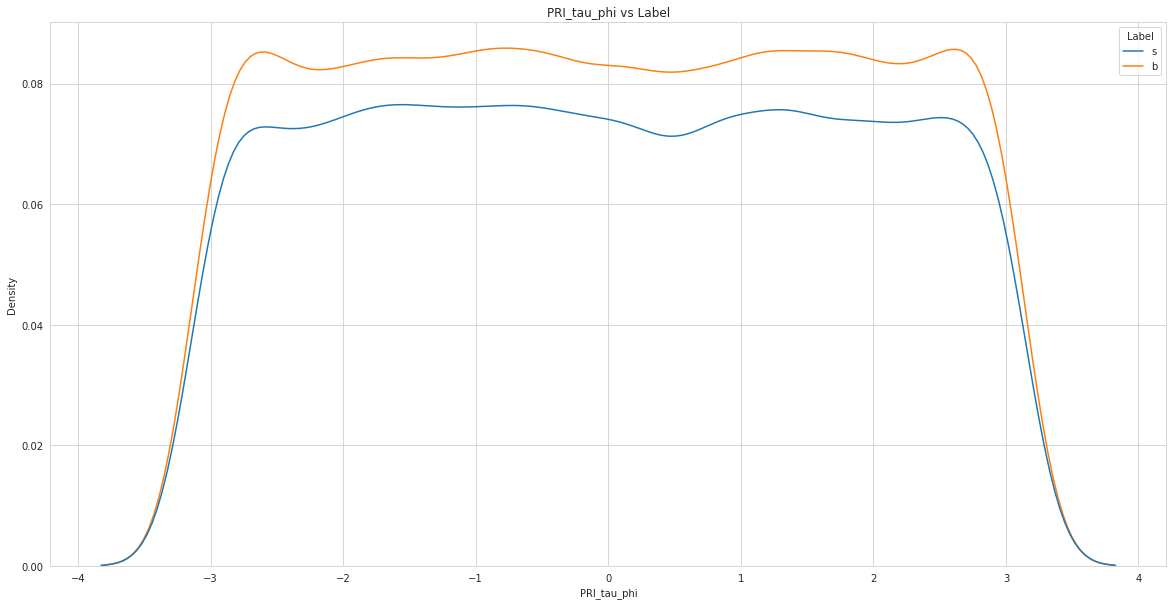

In [59]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_tau_phi"],hue=df["Label"],color="G")
plt.title("PRI_tau_phi vs Label")
plt.show()

In [60]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_tau_phi"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_tau_phi"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_tau_phi"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_tau_phi"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_tau_phi"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_tau_phi"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_tau_phi"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_tau_phi"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -3.141
The 25 percentile values is:  -1.57
The 50 percentile values is:  -0.009000000000000001
The 75 percentile values is:  1.58
The 90 percentile values is:  2.523
The 99 percentile values is:  3.083
The 99.1 percentile values is:  3.088
The 99.2 percentile values is:  3.094
The 99.3 percentile values is:  3.0989999999999998
The 99.4 percentile values is:  3.1039999999999996
The 99.5 percentile values is:  3.109
The 99.6 percentile values is:  3.115
The 99.7 percentile values is:  3.122
The 99.8 percentile values is:  3.127
The 99.9 percentile values is:  3.134
The 100 percentile values is:  3.142
****************************************************************************************************


# PRI_lep_pt

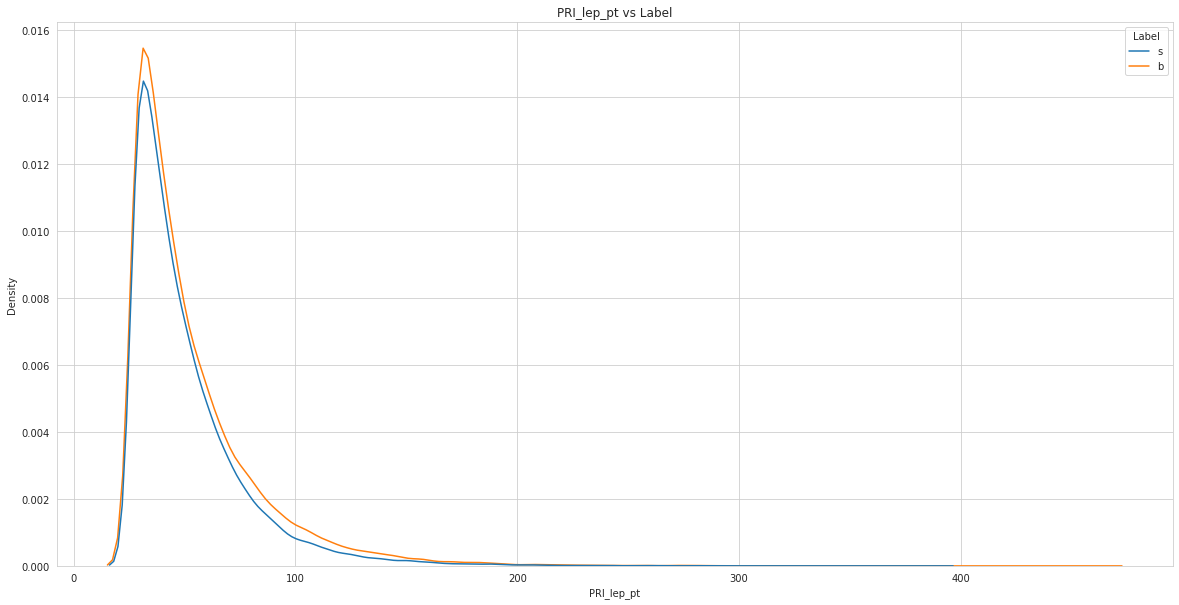

In [61]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_lep_pt"],hue=df["Label"],color="G")
plt.title("PRI_lep_pt vs Label")
plt.show()

In [62]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_lep_pt"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_lep_pt"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_lep_pt"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_lep_pt"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_lep_pt"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_lep_pt"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_lep_pt"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_lep_pt"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  26.000999999999998
The 25 percentile values is:  33.248000000000005
The 50 percentile values is:  43.356
The 75 percentile values is:  61.287
The 90 percentile values is:  85.95160000000001
The 99 percentile values is:  157.25671999999997
The 99.1 percentile values is:  160.07564799999997
The 99.2 percentile values is:  164.57061600000063
The 99.3 percentile values is:  170.01801600000005
The 99.4 percentile values is:  175.631584
The 99.5 percentile values is:  181.3911199999999
The 99.6 percentile values is:  188.37871999999993
The 99.7 percentile values is:  197.75229599999884
The 99.8 percentile values is:  213.97898400000204
The 99.9 percentile values is:  241.85780800000026
The 100 percentile values is:  461.89599999999996
****************************************************************************************************


In [63]:
# outliers remove at 100th percentile
df = df[(df['PRI_lep_pt'] < 259.3536570000042) & (df['PRI_lep_pt'] > 26.000999999999998)]
df.shape

(67438, 33)

# PRI_lep_eta

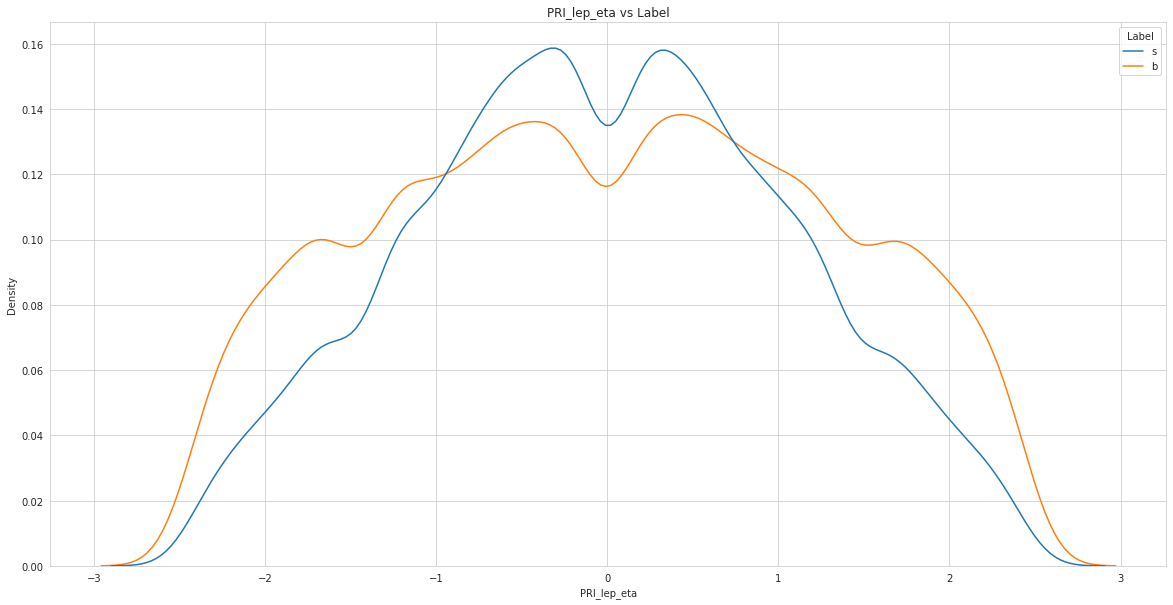

In [64]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_lep_eta"],hue=df["Label"],color="G")
plt.title("PRI_lep_eta vs Label")
plt.show()

In [65]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_lep_eta"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_lep_eta"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_lep_eta"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_lep_eta"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_lep_eta"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_lep_eta"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_lep_eta"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_lep_eta"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -2.487
The 25 percentile values is:  -0.9079999999999999
The 50 percentile values is:  -0.0105
The 75 percentile values is:  0.902
The 90 percentile values is:  1.659
The 99 percentile values is:  2.3369999999999997
The 99.1 percentile values is:  2.349
The 99.2 percentile values is:  2.358504000000001
The 99.3 percentile values is:  2.369
The 99.4 percentile values is:  2.38
The 99.5 percentile values is:  2.39
The 99.6 percentile values is:  2.404251999999993
The 99.7 percentile values is:  2.417
The 99.8 percentile values is:  2.4319999999999995
The 99.9 percentile values is:  2.4495630000000093
The 100 percentile values is:  2.499
****************************************************************************************************


# PRI_lep_phi

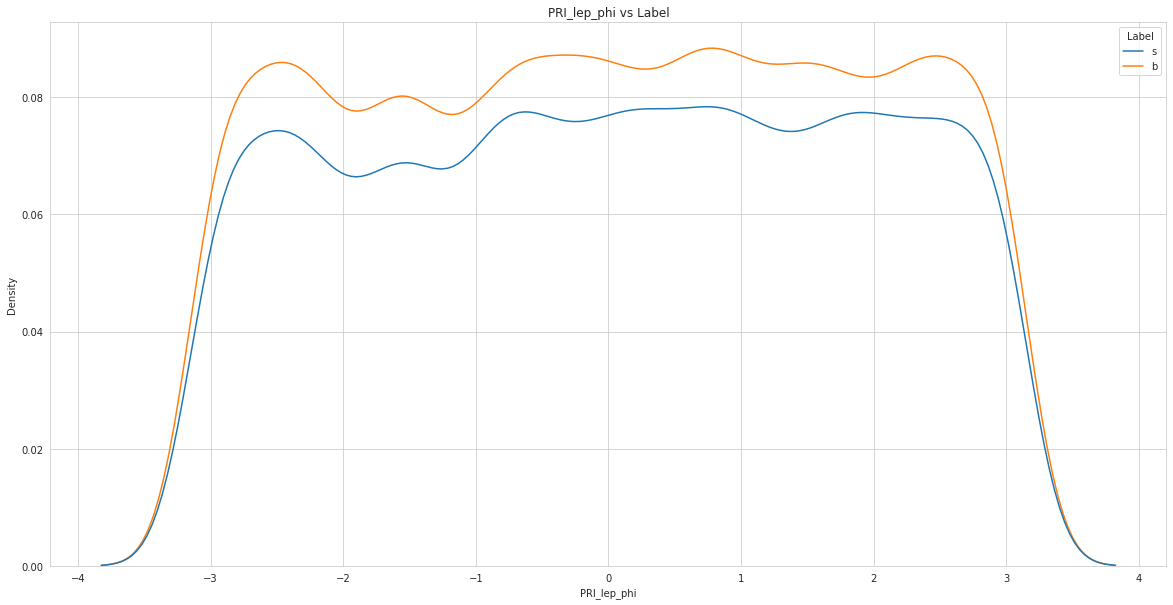

In [66]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_lep_phi"],hue=df["Label"],color="G")
plt.title("PRI_lep_phi vs Label")
plt.show()

In [67]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_lep_phi"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_lep_phi"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_lep_phi"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_lep_phi"],75))
print("The 99 percentile values is: ",np.percentile(df["PRI_lep_phi"],99))
print("The 90 percentile values is: ",np.percentile(df["PRI_lep_phi"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_lep_phi"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_lep_phi"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_lep_phi"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -3.142
The 25 percentile values is:  -1.518
The 50 percentile values is:  0.077
The 75 percentile values is:  1.609
The 99 percentile values is:  3.081630000000005
The 90 percentile values is:  2.533
The 99 percentile values is:  3.081630000000005
The 99.1 percentile values is:  3.0869999999999997
The 99.2 percentile values is:  3.095
The 99.3 percentile values is:  3.1
The 99.4 percentile values is:  3.1060000000000003
The 99.5 percentile values is:  3.113
The 99.6 percentile values is:  3.1180000000000003
The 99.7 percentile values is:  3.123
The 99.8 percentile values is:  3.1289999999999996
The 99.9 percentile values is:  3.135563000000009
The 100 percentile values is:  3.141
****************************************************************************************************


# PRI_met

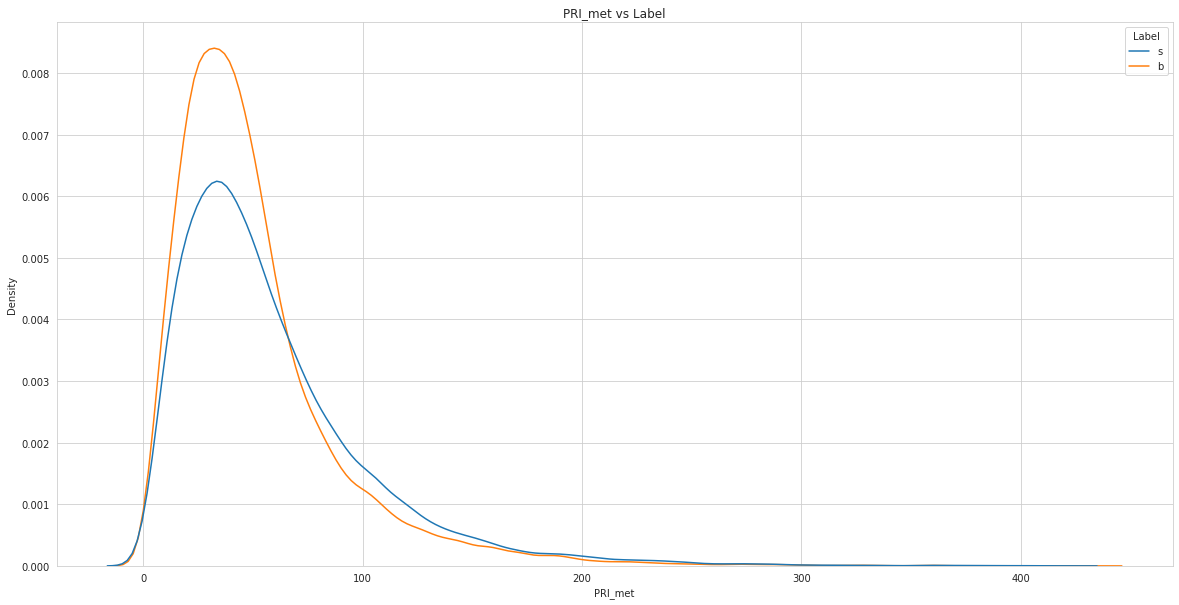

In [68]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_met"],hue=df["Label"],color="G")
plt.title("PRI_met vs Label")
plt.show()

In [69]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_met"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_met"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_met"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_met"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_met"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_met"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_met"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_met"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_met"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_met"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_met"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_met"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_met"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_met"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_met"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_met"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.2
The 25 percentile values is:  27.002
The 50 percentile values is:  44.1225
The 75 percentile values is:  68.99825
The 90 percentile values is:  105.389
The 99 percentile values is:  206.73278000000005
The 99.1 percentile values is:  211.933067
The 99.2 percentile values is:  217.8186
The 99.3 percentile values is:  224.00861000000128
The 99.4 percentile values is:  231.13889000000006
The 99.5 percentile values is:  238.4708950000001
The 99.6 percentile values is:  247.7868439999997
The 99.7 percentile values is:  264.1385509999997
The 99.8 percentile values is:  281.22971800000226
The 99.9 percentile values is:  310.2897920000146
The 100 percentile values is:  431.95599999999996
****************************************************************************************************


In [70]:
# outliers remove at 100th percentile
df = df[(df['PRI_met'] < 340.7668630000006) & (df['PRI_met'] > 0.2)]
df.shape

(67399, 33)

# PRI_met_phi

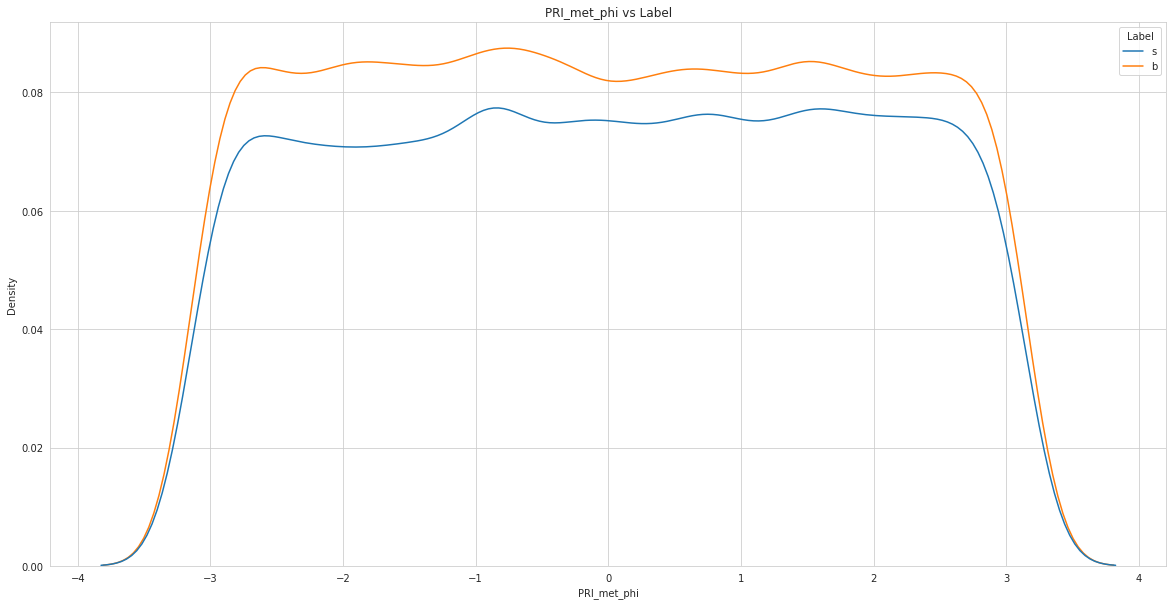

In [71]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_met_phi"],hue=df["Label"],color="G")
plt.title("PRI_met_phi vs Label")
plt.show()

In [72]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_met_phi"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_met_phi"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_met_phi"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_met_phi"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_met_phi"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_met_phi"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_met_phi"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_met_phi"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_met_phi"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_met_phi"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_met_phi"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_met_phi"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_met_phi"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_met_phi"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_met_phi"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_met_phi"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -3.142
The 25 percentile values is:  -1.551
The 50 percentile values is:  0.003
The 75 percentile values is:  1.5719999999999998
The 90 percentile values is:  2.515
The 99 percentile values is:  3.082
The 99.1 percentile values is:  3.0869999999999997
The 99.2 percentile values is:  3.093
The 99.3 percentile values is:  3.0989999999999993
The 99.4 percentile values is:  3.105
The 99.5 percentile values is:  3.112
The 99.6 percentile values is:  3.1180000000000003
The 99.7 percentile values is:  3.1239999999999997
The 99.8 percentile values is:  3.13
The 99.9 percentile values is:  3.135
The 100 percentile values is:  3.142
****************************************************************************************************


# PRI_met_sumet

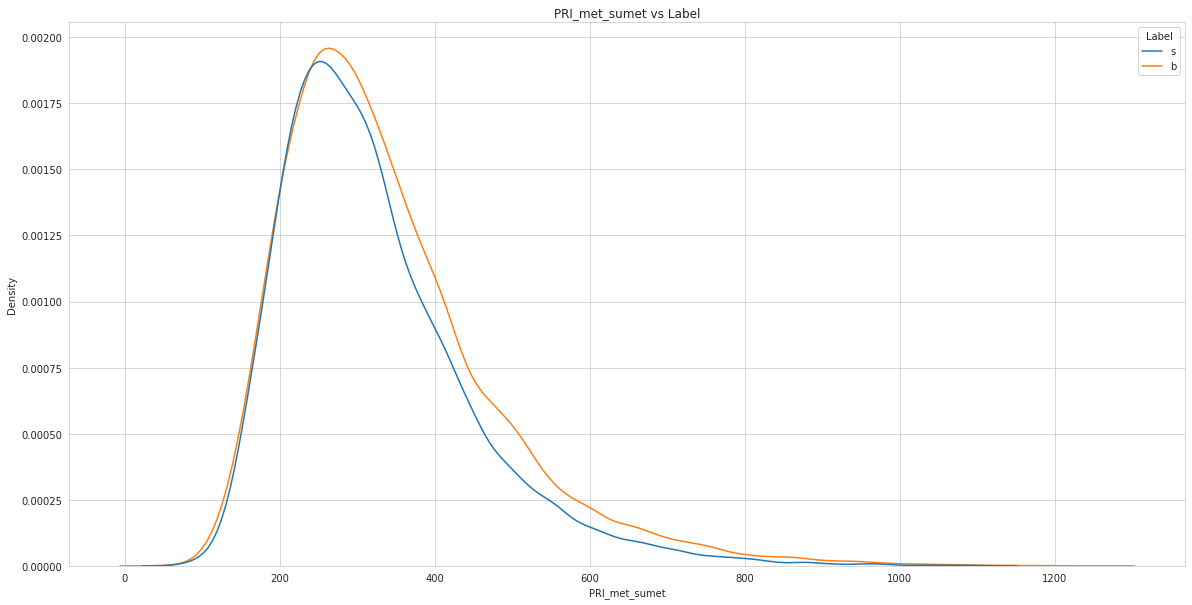

In [73]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_met_sumet"],hue=df["Label"],color="G")
plt.title("PRI_met_sumet vs Label")
plt.show()

In [74]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_met_sumet"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_met_sumet"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_met_sumet"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_met_sumet"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_met_sumet"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_met_sumet"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_met_sumet"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_met_sumet"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  44.958999999999996
The 25 percentile values is:  238.89700000000002
The 50 percentile values is:  304.312
The 75 percentile values is:  394.168
The 90 percentile values is:  503.88480000000004
The 99 percentile values is:  774.19334
The 99.1 percentile values is:  785.7857200000001
The 99.2 percentile values is:  800.5726800000031
The 99.3 percentile values is:  814.350568
The 99.4 percentile values is:  832.3832600000051
The 99.5 percentile values is:  853.014829999998
The 99.6 percentile values is:  874.2540959999994
The 99.7 percentile values is:  904.9395819999985
The 99.8 percentile values is:  944.8462999999998
The 99.9 percentile values is:  993.0501720000377
The 100 percentile values is:  1251.996
****************************************************************************************************


In [75]:
# outliers remove at 100th percentile
df = df[(df['PRI_met_sumet'] < 993.0501720000377) & (df['PRI_met_sumet'] > 44.958999999999996)]
df.shape

(67330, 33)

# PRI_jet_num

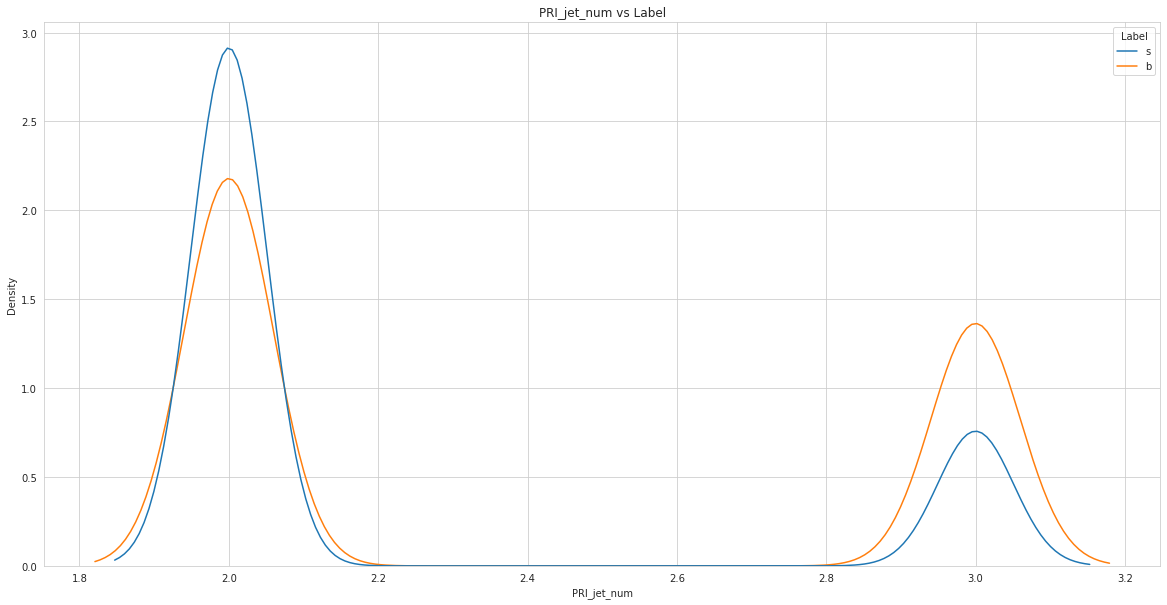

In [76]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_jet_num"],hue=df["Label"],color="G")
plt.title("PRI_jet_num vs Label")
plt.show()

In [77]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_jet_num"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_jet_num"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_jet_num"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_jet_num"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_jet_num"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_jet_num"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_jet_num"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_jet_num"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_jet_num"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_jet_num"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_jet_num"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_jet_num"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_jet_num"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_jet_num"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_jet_num"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_jet_num"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  2.0
The 25 percentile values is:  2.0
The 50 percentile values is:  2.0
The 75 percentile values is:  3.0
The 90 percentile values is:  3.0
The 99 percentile values is:  3.0
The 99.1 percentile values is:  3.0
The 99.2 percentile values is:  3.0
The 99.3 percentile values is:  3.0
The 99.4 percentile values is:  3.0
The 99.5 percentile values is:  3.0
The 99.6 percentile values is:  3.0
The 99.7 percentile values is:  3.0
The 99.8 percentile values is:  3.0
The 99.9 percentile values is:  3.0
The 100 percentile values is:  3.0
****************************************************************************************************


# PRI_jet_leading_pt

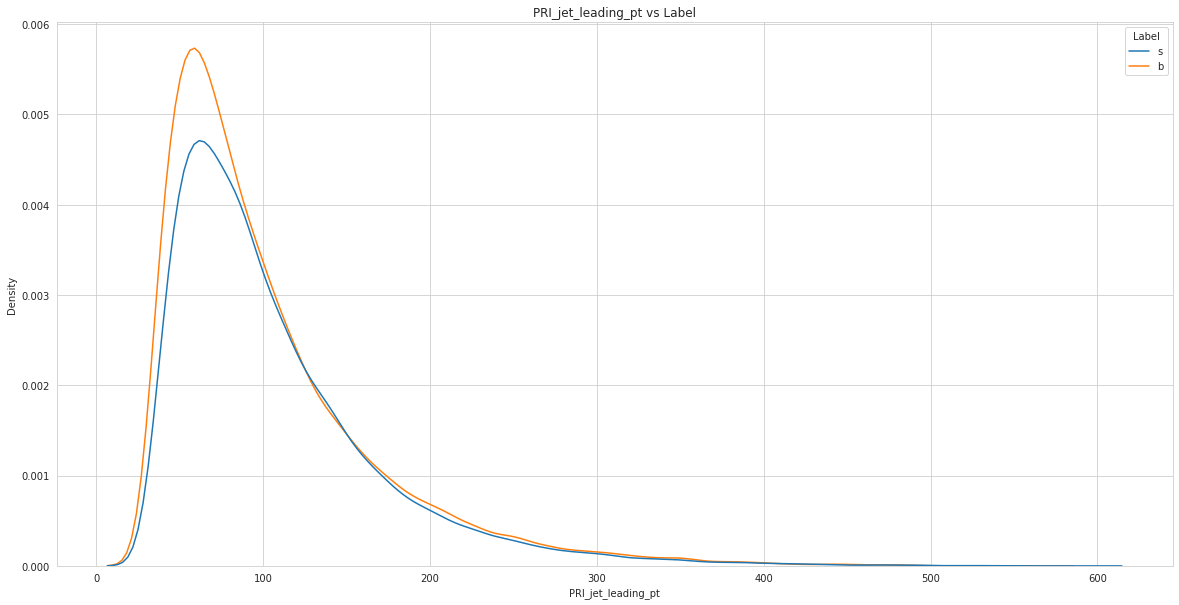

In [78]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_jet_leading_pt"],hue=df["Label"],color="G")
plt.title("PRI_jet_leading_pt vs Label")
plt.show()

In [79]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_jet_leading_pt"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  30.195999999999998
The 25 percentile values is:  60.736999999999995
The 50 percentile values is:  86.9915
The 75 percentile values is:  129.77450000000002
The 90 percentile values is:  187.72109999999998
The 99 percentile values is:  337.0294900000001
The 99.1 percentile values is:  343.8785600000001
The 99.2 percentile values is:  348.8932160000002
The 99.3 percentile values is:  355.595184
The 99.4 percentile values is:  364.4804180000012
The 99.5 percentile values is:  377.0647299999995
The 99.6 percentile values is:  388.2901359999994
The 99.7 percentile values is:  402.7117160000008
The 99.8 percentile values is:  422.48854600000027
The 99.9 percentile values is:  454.51568000000015
The 100 percentile values is:  590.906
****************************************************************************************************


In [80]:
# outliers remove at 100th percentile
df = df[(df['PRI_jet_leading_pt'] < 454.51568000000015) & (df['PRI_jet_leading_pt'] > 30.195999999999998)]
df.shape

(67261, 33)

# PRI_jet_leading_eta

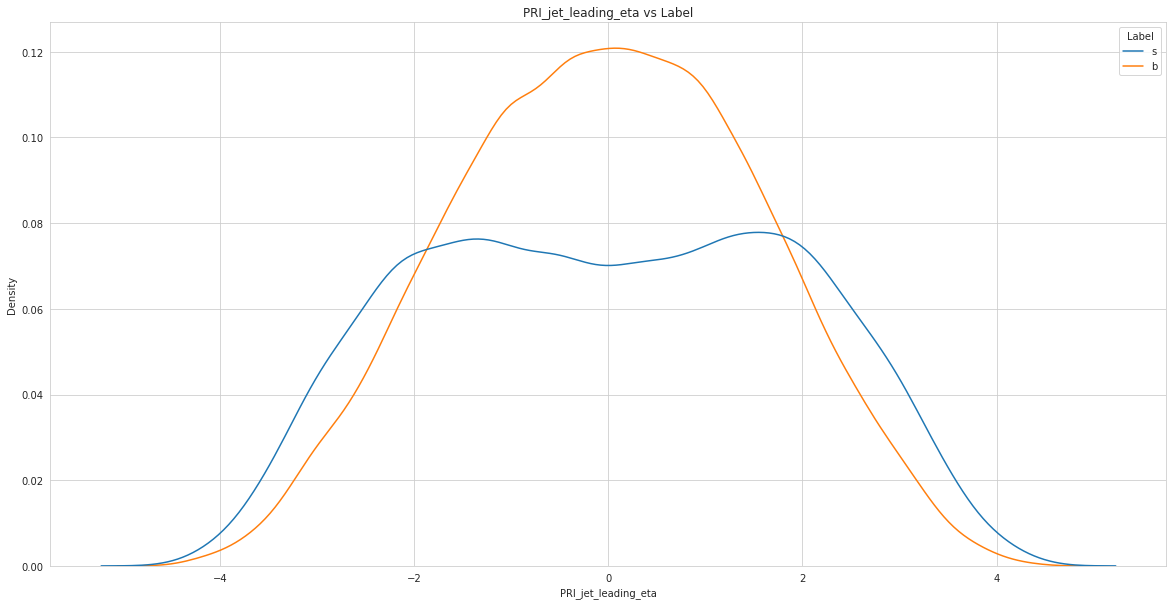

In [81]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_jet_leading_eta"],hue=df["Label"],color="G")
plt.title("PRI_jet_leading_eta vs Label")
plt.show()

In [82]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_jet_leading_eta"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -4.497
The 25 percentile values is:  -1.344
The 50 percentile values is:  0.001
The 75 percentile values is:  1.334
The 90 percentile values is:  2.323
The 99 percentile values is:  3.551
The 99.1 percentile values is:  3.5826600000000033
The 99.2 percentile values is:  3.628
The 99.3 percentile values is:  3.667179999999993
The 99.4 percentile values is:  3.7250000000000005
The 99.5 percentile values is:  3.784699999999997
The 99.6 percentile values is:  3.8579600000000065
The 99.7 percentile values is:  3.930220000000001
The 99.8 percentile values is:  4.014399999999979
The 99.9 percentile values is:  4.1714800000000105
The 100 percentile values is:  4.499
****************************************************************************************************


# PRI_jet_leading_phi

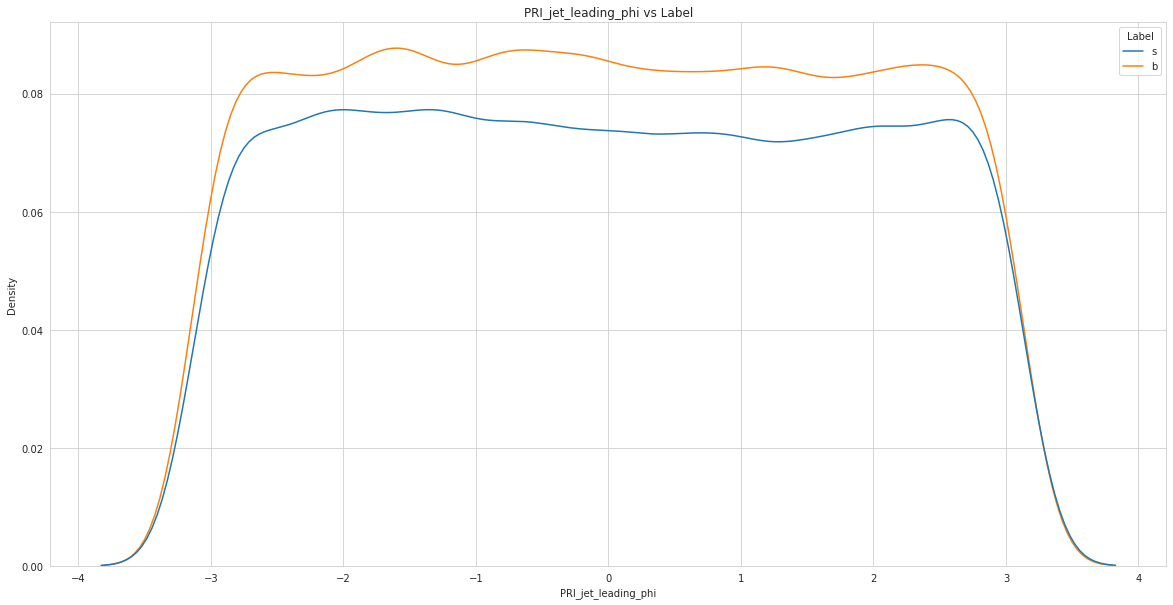

In [83]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_jet_leading_phi"],hue=df["Label"],color="G")
plt.title("PRI_jet_leading_phi vs Label")
plt.show()

In [84]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_jet_leading_phi"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -3.142
The 25 percentile values is:  -1.575
The 50 percentile values is:  -0.031
The 75 percentile values is:  1.5590000000000002
The 90 percentile values is:  2.511
The 99 percentile values is:  3.073399999999994
The 99.1 percentile values is:  3.08
The 99.2 percentile values is:  3.087919999999998
The 99.3 percentile values is:  3.093
The 99.4 percentile values is:  3.0980000000000003
The 99.5 percentile values is:  3.1050000000000004
The 99.6 percentile values is:  3.111
The 99.7 percentile values is:  3.1180000000000003
The 99.8 percentile values is:  3.125
The 99.9 percentile values is:  3.1327400000000054
The 100 percentile values is:  3.141
****************************************************************************************************


# PRI_jet_subleading_pt

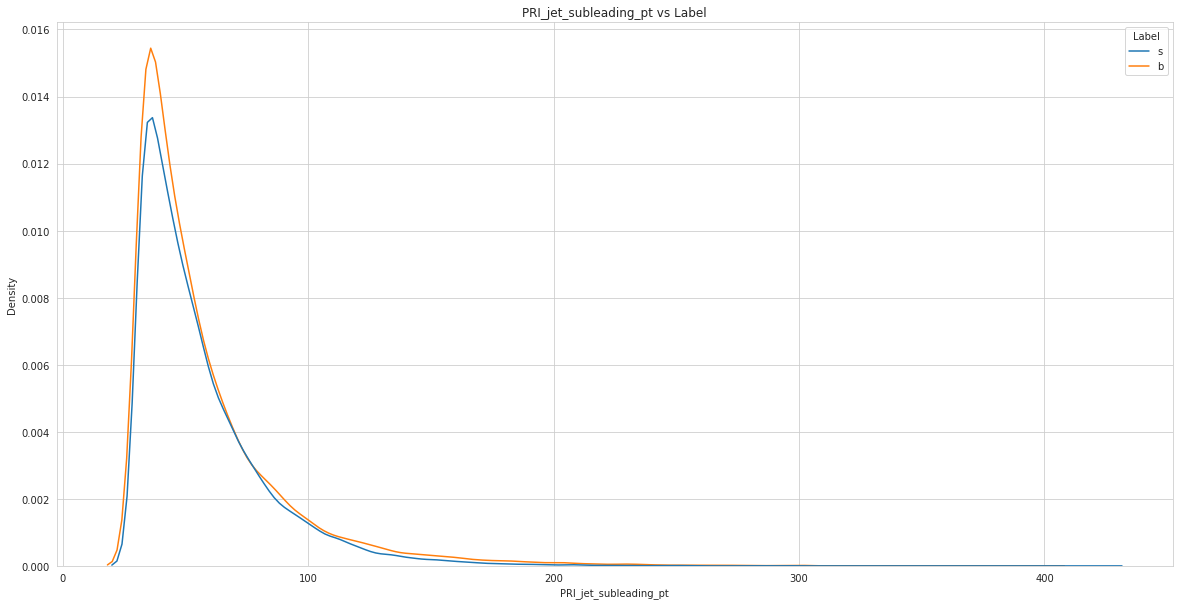

In [85]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_jet_subleading_pt"],hue=df["Label"],color="G")
plt.title("PRI_jet_subleading_pt vs Label")
plt.show()

In [86]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  30.0
The 25 percentile values is:  37.346
The 50 percentile values is:  47.933
The 75 percentile values is:  66.50399999999999
The 90 percentile values is:  92.78
The 99 percentile values is:  171.02999999999997
The 99.1 percentile values is:  175.6016400000002
The 99.2 percentile values is:  179.77083999999977
The 99.3 percentile values is:  184.6369999999986
The 99.4 percentile values is:  191.04528000000005
The 99.5 percentile values is:  197.98119999999966
The 99.6 percentile values is:  205.56144000000123
The 99.7 percentile values is:  216.02752000000015
The 99.8 percentile values is:  231.69544000000002
The 99.9 percentile values is:  258.6327200000038
The 100 percentile values is:  421.566
****************************************************************************************************


In [87]:
# outliers remove at 100th percentile
df = df[(df['PRI_jet_subleading_pt'] < 258.6327200000038) & (df['PRI_jet_subleading_pt'] > 30.0)]
df.shape

(67192, 33)

# PRI_jet_subleading_eta

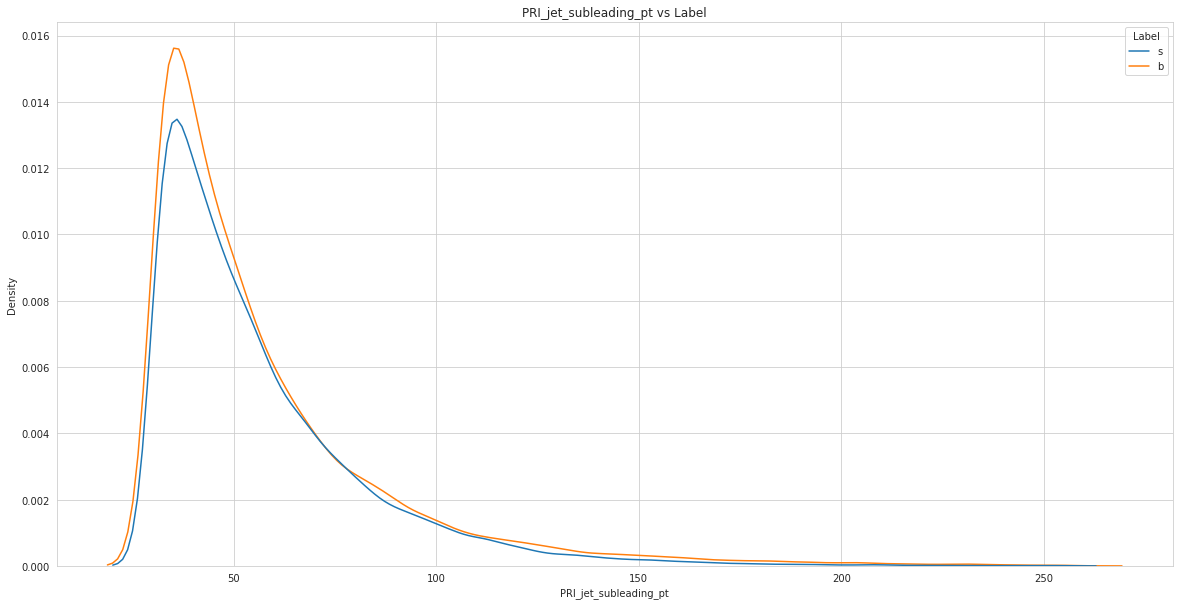

In [88]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_jet_subleading_pt"],hue=df["Label"],color="G")
plt.title("PRI_jet_subleading_pt vs Label")
plt.show()

In [89]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_jet_subleading_pt"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  30.000999999999998
The 25 percentile values is:  37.33975
The 50 percentile values is:  47.903499999999994
The 75 percentile values is:  66.41975
The 90 percentile values is:  92.48299999999999
The 99 percentile values is:  167.36181999999962
The 99.1 percentile values is:  171.029405
The 99.2 percentile values is:  175.59148799999969
The 99.3 percentile values is:  179.73820100000006
The 99.4 percentile values is:  184.59501400000028
The 99.5 percentile values is:  191.04054
The 99.6 percentile values is:  197.92273600000055
The 99.7 percentile values is:  205.46070299999926
The 99.8 percentile values is:  215.95959800000026
The 99.9 percentile values is:  231.60403900000398
The 100 percentile values is:  258.094
****************************************************************************************************


In [90]:
# outliers remove at 100th percentile
df = df[(df['PRI_jet_subleading_pt'] < 231.60403900000398) & (df['PRI_jet_subleading_pt'] > 30.0)]
df.shape

(67124, 33)

# PRI_jet_subleading_phi

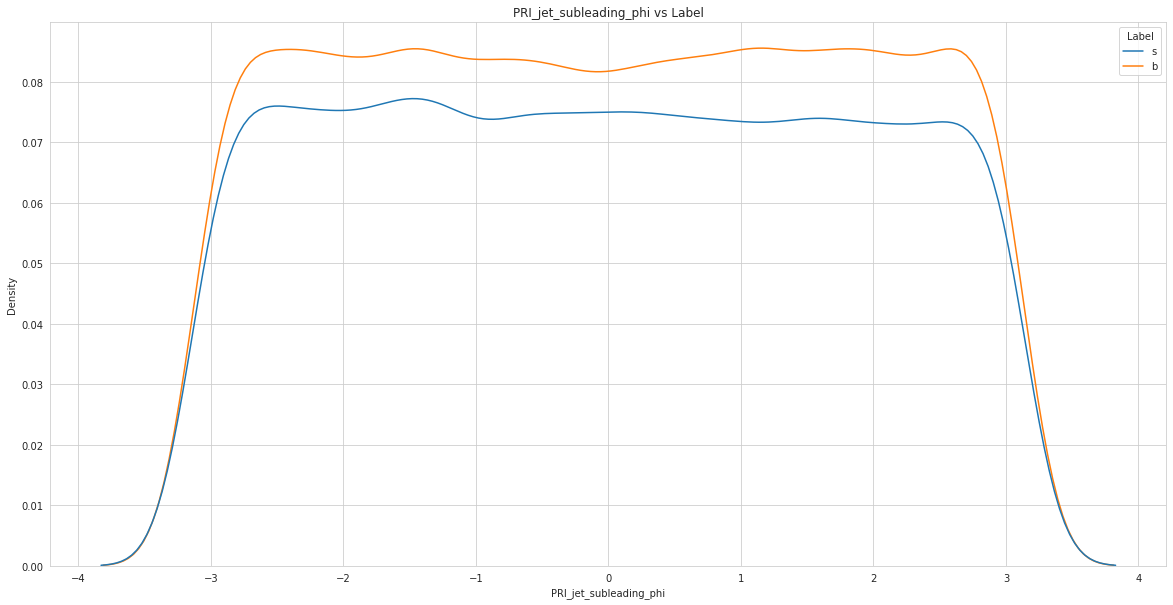

In [91]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_jet_subleading_phi"],hue=df["Label"],color="G")
plt.title("PRI_jet_subleading_phi vs Label")
plt.show()

In [92]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_jet_subleading_phi"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  -3.142
The 25 percentile values is:  -1.58
The 50 percentile values is:  -0.008
The 75 percentile values is:  1.5730000000000002
The 90 percentile values is:  2.5180000000000002
The 99 percentile values is:  3.08
The 99.1 percentile values is:  3.085
The 99.2 percentile values is:  3.092
The 99.3 percentile values is:  3.0961389999999955
The 99.4 percentile values is:  3.1039999999999996
The 99.5 percentile values is:  3.109
The 99.6 percentile values is:  3.117
The 99.7 percentile values is:  3.123
The 99.8 percentile values is:  3.1289999999999996
The 99.9 percentile values is:  3.135
The 100 percentile values is:  3.142
****************************************************************************************************


# PRI_jet_all_pt

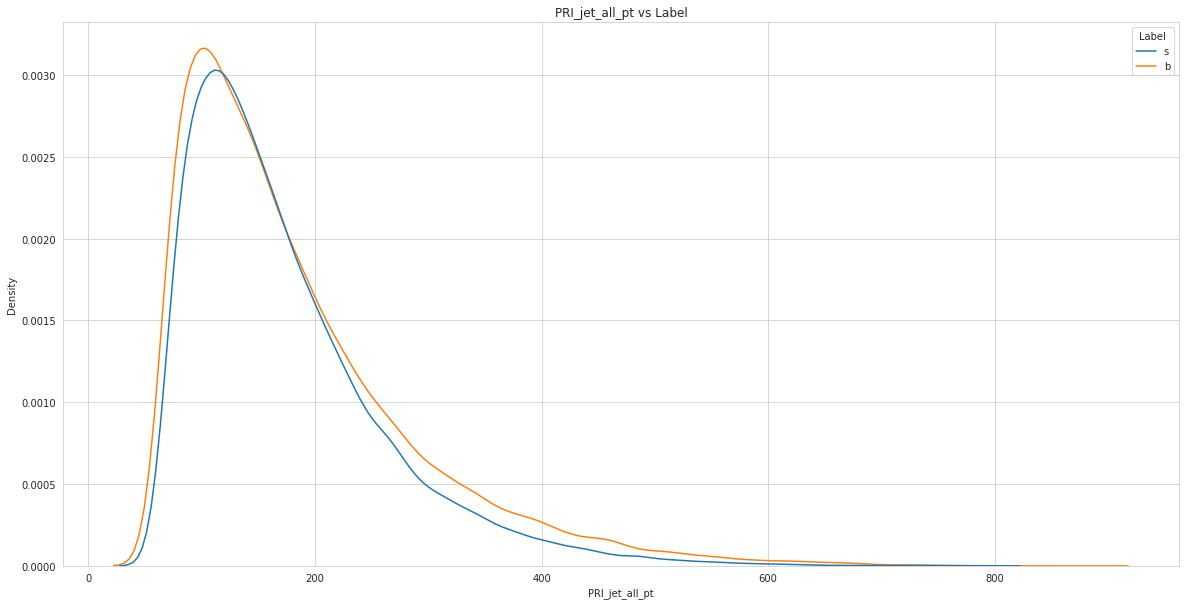

In [93]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["PRI_jet_all_pt"],hue=df["Label"],color="G")
plt.title("PRI_jet_all_pt vs Label")
plt.show()

In [94]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],0))
print("The 25 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],25))
print("The 50 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],50))
print("The 75 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],75))
print("The 90 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],90))
print("The 99 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99))
print("The 99.1 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],99.9))
print("The 100 percentile values is: ",np.percentile(df["PRI_jet_all_pt"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  60.494
The 25 percentile values is:  109.15100000000001
The 50 percentile values is:  153.14600000000002
The 75 percentile values is:  220.8025
The 90 percentile values is:  308.4277
The 99 percentile values is:  511.9290500000003
The 99.1 percentile values is:  519.3165389999999
The 99.2 percentile values is:  529.0292160000002
The 99.3 percentile values is:  539.2001549999993
The 99.4 percentile values is:  551.9527460000003
The 99.5 percentile values is:  563.9118399999991
The 99.6 percentile values is:  582.879796
The 99.7 percentile values is:  604.9650549999945
The 99.8 percentile values is:  629.2868040000002
The 99.9 percentile values is:  667.953385
The 100 percentile values is:  879.648
****************************************************************************************************


In [95]:
# outliers remove at 100th percentile
df = df[(df['PRI_jet_all_pt'] < 667.953385) & (df['PRI_jet_all_pt'] > 60.494)]
df.shape

(67055, 33)

# Weight

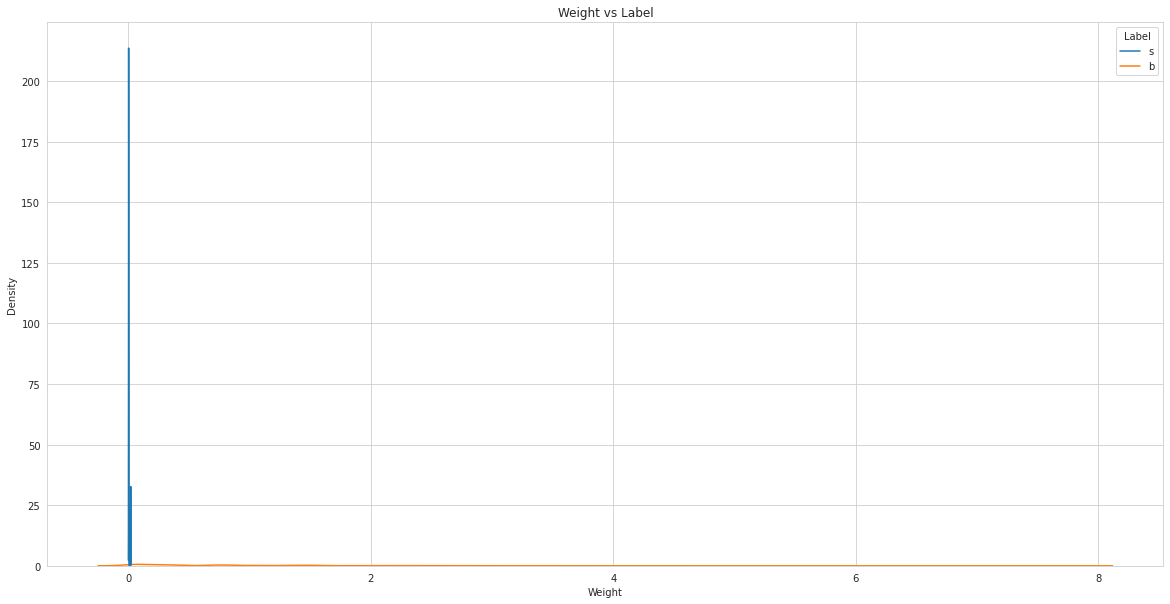

In [96]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.kdeplot(df["Weight"],hue=df["Label"],color="G")
plt.title("Weight vs Label")
plt.show()

In [97]:
print("*"*100)
print("The 0 percentile values is: ",np.percentile(df["Weight"],0))
print("The 25 percentile values is: ",np.percentile(df["Weight"],25))
print("The 50 percentile values is: ",np.percentile(df["Weight"],50))
print("The 75 percentile values is: ",np.percentile(df["Weight"],75))
print("The 90 percentile values is: ",np.percentile(df["Weight"],90))
print("The 99 percentile values is: ",np.percentile(df["Weight"],99))
print("The 99.1 percentile values is: ",np.percentile(df["Weight"],99.1))
print("The 99.2 percentile values is: ",np.percentile(df["Weight"],99.2))
print("The 99.3 percentile values is: ",np.percentile(df["Weight"],99.3))
print("The 99.4 percentile values is: ",np.percentile(df["Weight"],99.4))
print("The 99.5 percentile values is: ",np.percentile(df["Weight"],99.5))
print("The 99.6 percentile values is: ",np.percentile(df["Weight"],99.6))
print("The 99.7 percentile values is: ",np.percentile(df["Weight"],99.7))
print("The 99.8 percentile values is: ",np.percentile(df["Weight"],99.8))
print("The 99.9 percentile values is: ",np.percentile(df["Weight"],99.9))
print("The 100 percentile values is: ",np.percentile(df["Weight"],100))
print("*"*100)

****************************************************************************************************
The 0 percentile values is:  0.00150187015894
The 25 percentile values is:  0.0015027048310099999
The 50 percentile values is:  0.0640607773058
The 75 percentile values is:  0.7440562472300001
The 90 percentile values is:  1.4548484726800002
The 99 percentile values is:  2.937928575691
The 99.1 percentile values is:  2.9864408257319375
The 99.2 percentile values is:  3.039021921521199
The 99.3 percentile values is:  3.098947217087362
The 99.4 percentile values is:  3.165106392990964
The 99.5 percentile values is:  3.2543945916609927
The 99.6 percentile values is:  3.37192465616
The 99.7 percentile values is:  4.487713868215174
The 99.8 percentile values is:  4.963865619577424
The 99.9 percentile values is:  5.682633920853322
The 100 percentile values is:  7.805034958110001
****************************************************************************************************


In [98]:
# outliers remove at 100th percentile
df = df[(df['Weight'] < 5.681390277907166) & (df['Weight'] > 0.00150187015894)]
df.shape

(64071, 33)

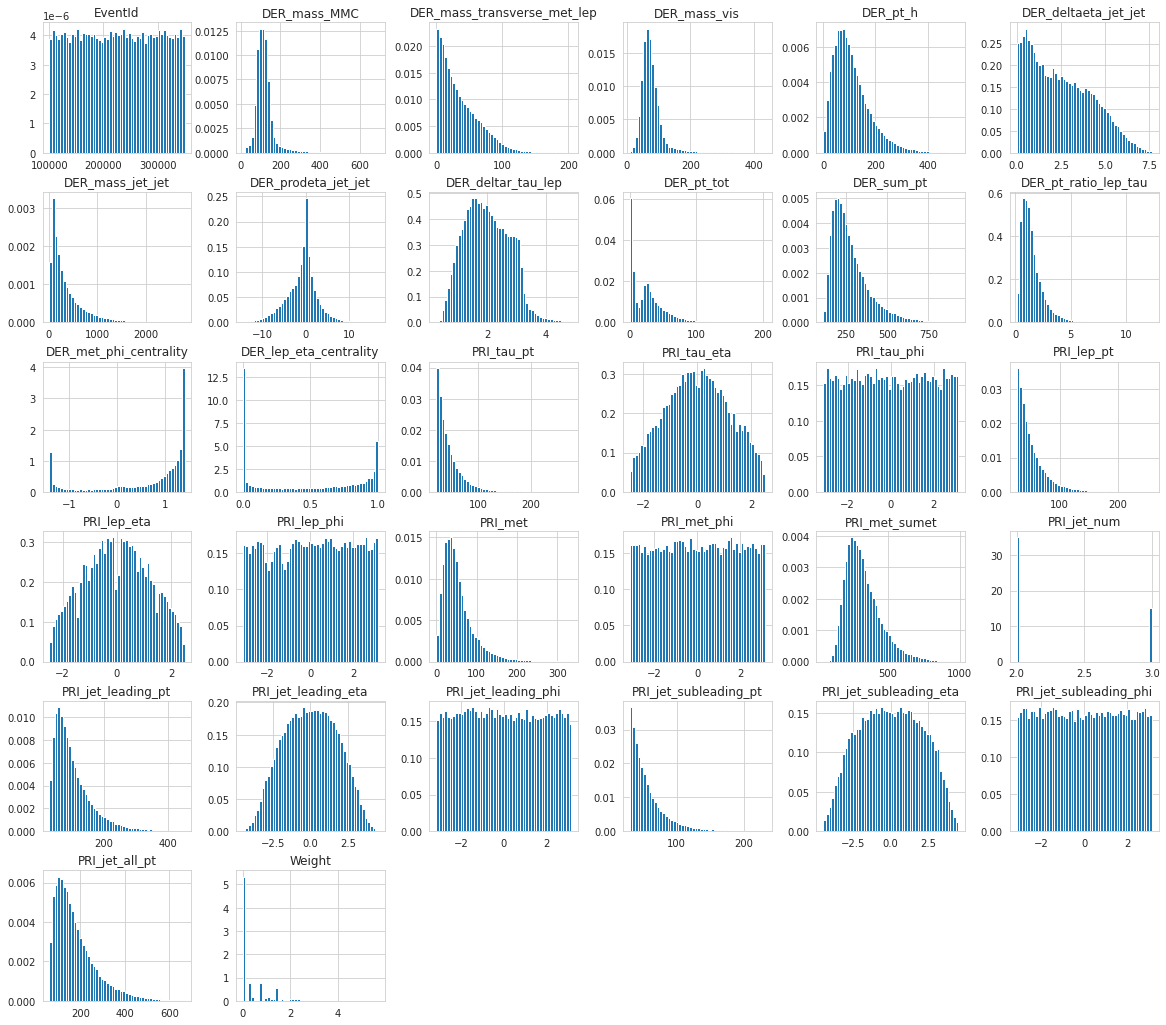

In [99]:
df.hist(bins=50,figsize=(20,18),density=True)
plt.show()

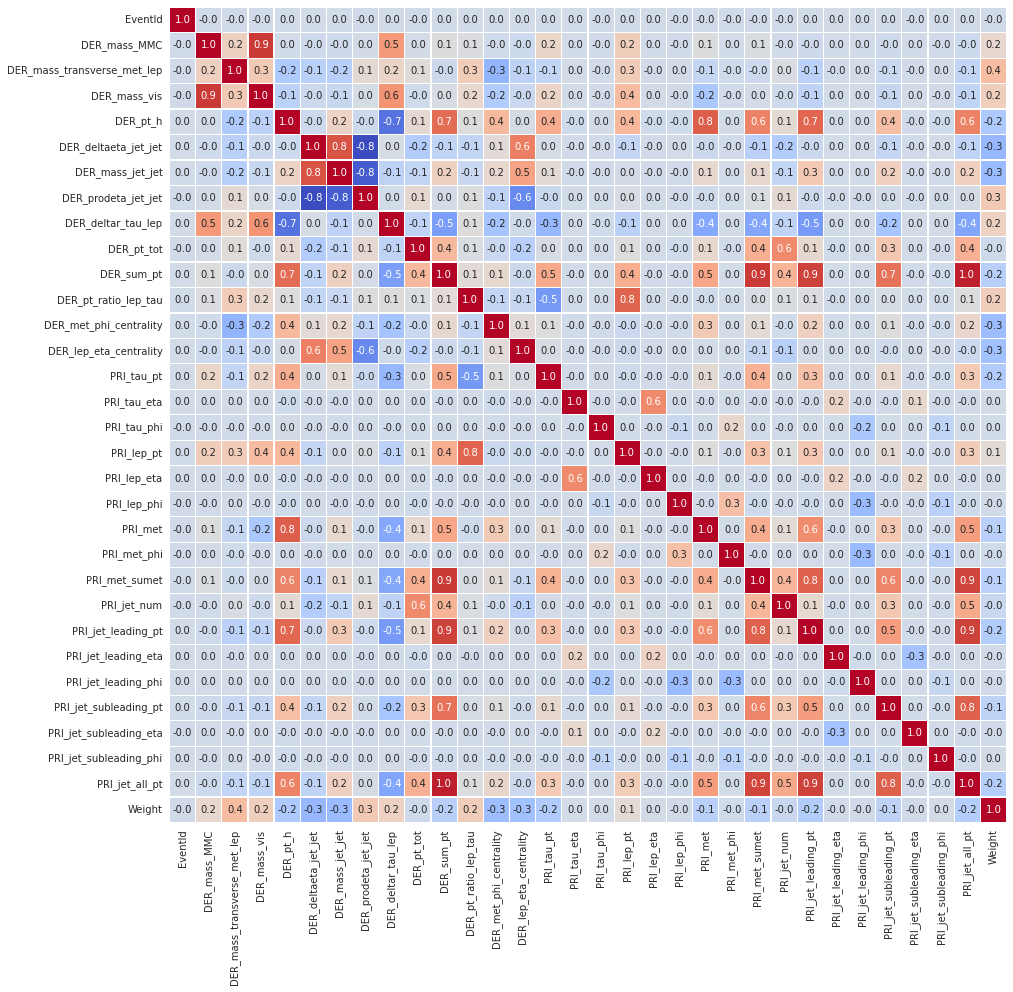

In [100]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method='pearson'), fmt='.1f', annot=True, cbar=False, linewidth=0.2, cmap='coolwarm')

In [101]:
df.head()

EventId  DER_mass_MMC  ...    Weight  Label
0    100000       138.470  ...  0.002653      s
5    100005        89.744  ...  0.083414      b
6    100006       148.754  ...  0.002653      s
11   100011       114.744  ...  0.307170      b
23   100023       141.481  ...  0.001503      s

[5 rows x 33 columns]

# AutoML Libraries

# DABL (Data Analysis Baseline Library) Auto EDA Library

Target looks like classification
Showing only top 10 of 31 continuous features
Linear Discriminant Analysis training set score: 0.848


[[<Figure size 1440x288 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

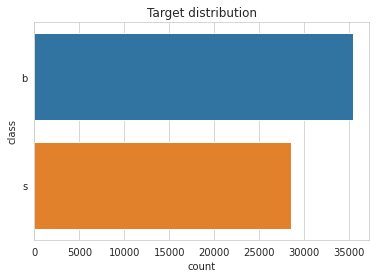

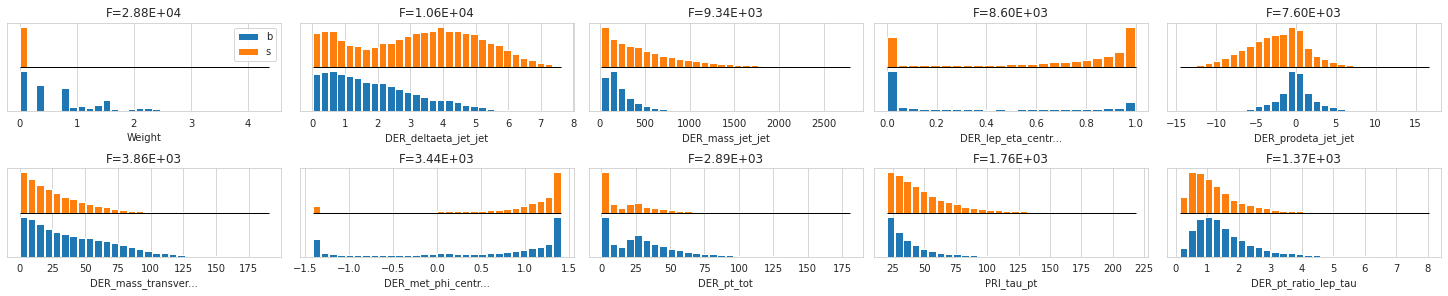

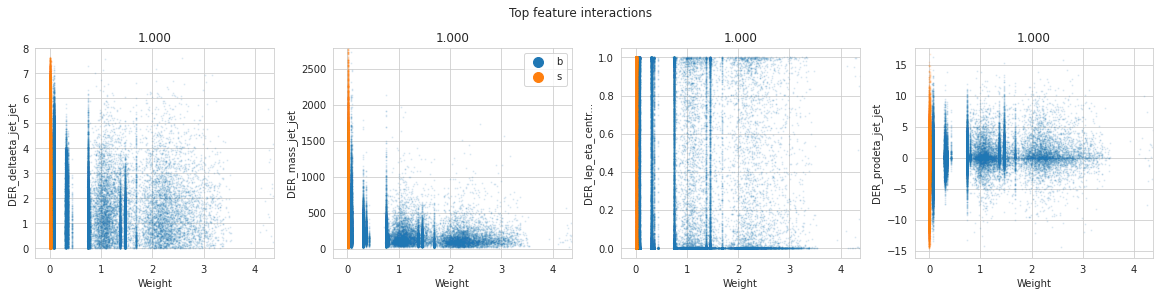

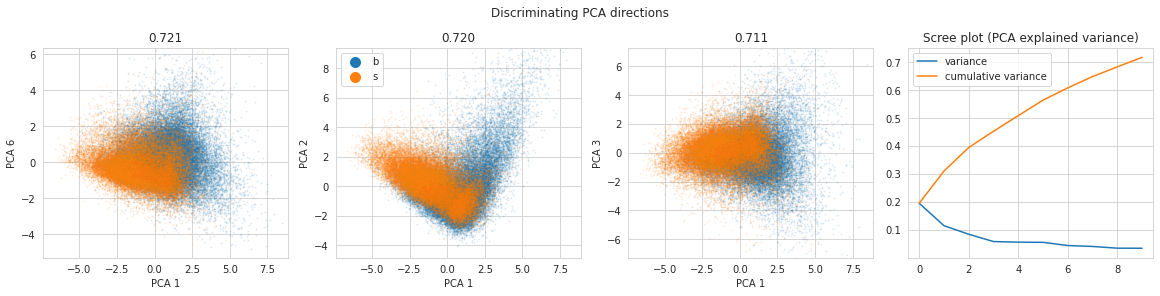

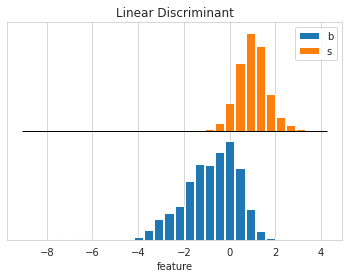

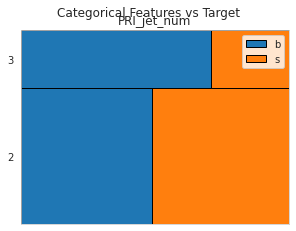

In [102]:
import dabl
dabl.plot(df,'Label')

# Feature Engineering

In [103]:
# label encoding the label
le = LabelEncoder()
df["Label"] = le.fit_transform(df["Label"])
df.head() 

EventId  DER_mass_MMC  ...    Weight  Label
0    100000       138.470  ...  0.002653      1
5    100005        89.744  ...  0.083414      0
6    100006       148.754  ...  0.002653      1
11   100011       114.744  ...  0.307170      0
23   100023       141.481  ...  0.001503      1

[5 rows x 33 columns]

In [104]:
df["Label"].value_counts()

0    35474
1    28597
Name: Label, dtype: int64

In [105]:
print("="*100)
print("The Percentage of Background are: ",(df["Label"].value_counts()[0]*100)/df["Label"].count(),"%")
print("="*100)
print("The Percentage of Signal are: ",(df["Label"].value_counts()[1]*100)/df["Label"].count(),"%")
print("="*100)

The Percentage of Background are:  55.36670256434268 %
The Percentage of Signal are:  44.63329743565732 %


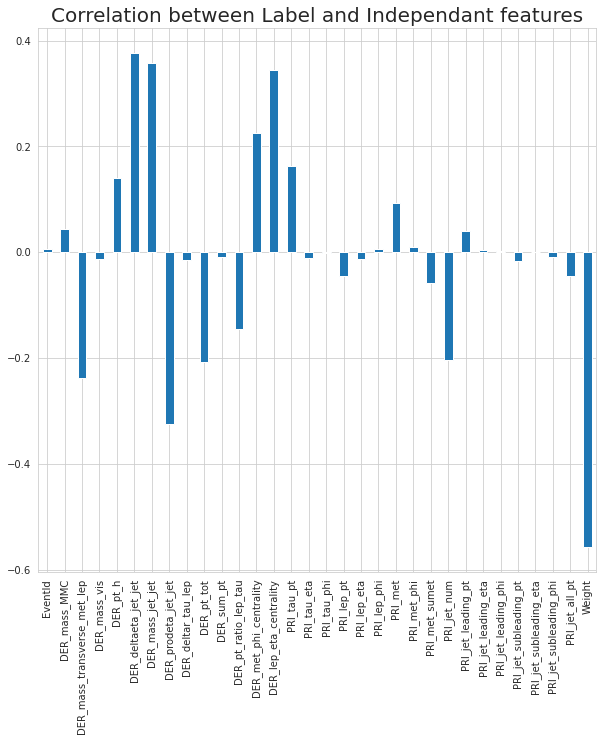

In [106]:
d = df.drop(['Label'],axis=1)
d.corrwith(df['Label']).plot(kind='bar',figsize=(10,10))
plt.title('Correlation between Label and Independant features', size=20)
plt.show()

In [107]:
df.drop(columns=["DER_met_phi_centrality","DER_lep_eta_centrality","EventId",
                 "PRI_met_phi","PRI_lep_eta","PRI_lep_phi","PRI_tau_eta","PRI_tau_phi","PRI_tau_pt",
                 "PRI_jet_subleading_eta","PRI_jet_subleading_phi",
                 "PRI_jet_leading_phi","PRI_jet_leading_eta",
                 "Weight"],axis=1,inplace=True)

In [108]:
df.shape

(64071, 19)

# Modelling

In [109]:
X = df.drop(columns="Label",axis=1)
y = df["Label"] 

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("The Shape of X_train : ",X_train.shape)
print("The Shape of X_test  : ",X_test.shape)
print("="*100)
print("The Shape of y_train : ",y_train.shape)
print("The Shape of y_train : ",y_test.shape)

The Shape of X_train :  (51256, 18)
The Shape of X_test  :  (12815, 18)
The Shape of y_train :  (51256,)
The Shape of y_train :  (12815,)


In [111]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scale_columns = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h",
                 "DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep",
                 "DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","PRI_lep_pt","PRI_met",
                 "PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_subleading_pt","PRI_jet_all_pt"]

standard_Scaling = StandardScaler()

In [112]:
def scaler_columns(data_tr,data_te,column):
  
  standard_Scaling.fit(data_tr[column].values.reshape(-1,1))

  scaler_train = standard_Scaling.transform(data_tr[column].values.reshape(-1,1))
  
  scaler_test = standard_Scaling.transform(data_te[column].values.reshape(-1,1))

  return scaler_train, scaler_test

In [113]:
for i in scale_columns:
  X_train[i], X_test[i] = scaler_columns(X_train,X_test,i)

# Machine Learning Model

# Baseline Model

# Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score,f1_score, roc_curve,auc 

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg = LogisticRegression()
cross_val = GridSearchCV(logreg, grid, cv=5,n_jobs=-1,verbose=2)
cross_val.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [115]:
print("best parameters = ",cross_val.best_params_)

best parameters =  {'C': 0.1, 'penalty': 'l2'}


The F1_Score of Train:  0.6809125439843404
The F1_Score of Test:  0.6865177832919769


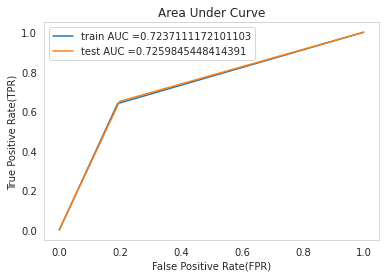

Actual state  Predicted state
60837              1                1
197422             0                0
31929              0                1
247742             0                0
58773              1                1

In [116]:
logreg_best = cross_val.best_estimator_
logreg_best.fit(X_train,y_train)

y_train_pred = logreg_best.predict(X_train)
y_test_pred = logreg_best.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

#f1_score
f1_score_train = f1_score(y_train,y_train_pred)
f1_score_test = f1_score(y_test,y_test_pred)

print("="*50)
print("The F1_Score of Train: ",f1_score_train)
print("The F1_Score of Test: ",f1_score_test)
print("="*50)

print("="*50)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Area Under Curve")
plt.grid()
plt.show()
print("="*50)

d = pd.DataFrame({'Actual state': y_test, 'Predicted state': y_test_pred})
d.head(5)

# SGDClassifier

In [117]:
# SGD CLASSIFIER
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
alpha = [0.0001,0.001,0.01,0.1,1,10]
p = ["l1","l2"]

sgd = SGDClassifier(class_weight='balanced',loss="hinge")

params ={'alpha':alpha,
          'penalty':p}

cross_val = RandomizedSearchCV(sgd, param_distributions=params ,cv=5,n_jobs=-1,verbose=2)
cross_val.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SGDClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10],
                                        'penalty': ['l1', 'l2']},
                   verbose=2)

In [118]:
print("best parameters = ",cross_val.best_params_)

best parameters =  {'penalty': 'l2', 'alpha': 0.001}


The F1_Score of Train:  0.6952949146615967
The F1_Score of Test:  0.6967864547339323


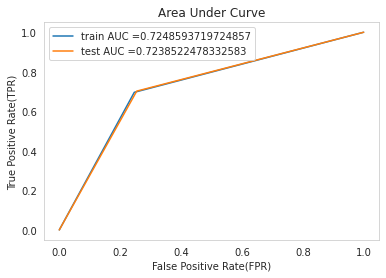

Actual state  Predicted state
60837              1                1
197422             0                0
31929              0                1
247742             0                0
58773              1                1

In [119]:
sgd_best = cross_val.best_estimator_
sgd_best.fit(X_train,y_train)

y_train_pred = sgd_best.predict(X_train)
y_test_pred = sgd_best.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

#f1_score
f1_score_train = f1_score(y_train,y_train_pred)
f1_score_test = f1_score(y_test,y_test_pred)

print("="*50)
print("The F1_Score of Train: ",f1_score_train)
print("The F1_Score of Test: ",f1_score_test)
print("="*50)

print("="*50)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Area Under Curve")
plt.grid()
plt.show()
print("="*50)

d = pd.DataFrame({'Actual state': y_test, 'Predicted state': y_test_pred})
d.head(5)

# Ensemble Models

# Decision Tree

In [120]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params={'max_depth':[10,20,30,50,70,90],
        'min_samples_split':[2,3,5,10,15]}

dt = DecisionTreeClassifier(class_weight="balanced")

cross_val = RandomizedSearchCV(dt, param_distributions=params, n_iter=10,cv=5,n_jobs=-1,verbose=2)
cross_val.fit(X_train,y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 50, 70, 90],
                                        'min_samples_split': [2, 3, 5, 10, 15]},
                   verbose=2)

In [121]:
print("best parameters = ",cross_val.best_params_)

best parameters =  {'min_samples_split': 2, 'max_depth': 10}


The F1_Score of Train:  0.8467676069611108
The F1_Score of Test:  0.7962533156498673


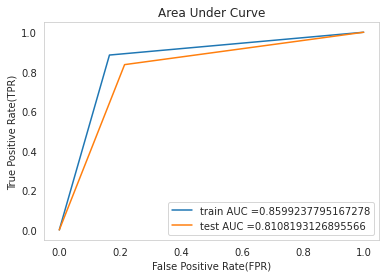

Actual state  Predicted state
60837              1                1
197422             0                0
31929              0                0
247742             0                0
58773              1                1

In [122]:
dt_best = cross_val.best_estimator_
dt_best.fit(X_train,y_train)

y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

#f1_score
f1_score_train = f1_score(y_train,y_train_pred)
f1_score_test = f1_score(y_test,y_test_pred)

print("="*50)
print("The F1_Score of Train: ",f1_score_train)
print("The F1_Score of Test: ",f1_score_test)
print("="*50)

print("="*50)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Area Under Curve")
plt.grid()
plt.show()
print("="*50)

d = pd.DataFrame({'Actual state': y_test, 'Predicted state': y_test_pred})
d.head(5)

# GradientBoostingClassifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbdt=GradientBoostingClassifier()
params={'max_depth': [1, 2, 3], 'learning_rate':[0.001,0.01,1]}

cross_val = RandomizedSearchCV(estimator=gbdt, param_distributions=params, cv=3,verbose=2,n_jobs=-1)
cross_val.fit(X_train,y_train) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 1],
                                        'max_depth': [1, 2, 3]},
                   verbose=2)

In [124]:
print("best parameters = ",cross_val.best_params_)

best parameters =  {'max_depth': 2, 'learning_rate': 1}


The F1_Score of Train:  0.8320488971565241
The F1_Score of Test:  0.8106685383400597


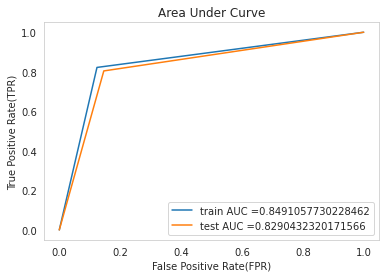

Actual state  Predicted state
60837              1                1
197422             0                0
31929              0                0
247742             0                0
58773              1                1

In [125]:
gbdt_best = cross_val.best_estimator_
gbdt_best.fit(X_train,y_train)

y_train_pred = gbdt_best.predict(X_train)
y_test_pred = gbdt_best.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

#f1_score
f1_score_train = f1_score(y_train,y_train_pred)
f1_score_test = f1_score(y_test,y_test_pred)

print("="*50)
print("The F1_Score of Train: ",f1_score_train)
print("The F1_Score of Test: ",f1_score_test)
print("="*50)

print("="*50)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Area Under Curve")
plt.grid()
plt.show()
print("="*50)

d = pd.DataFrame({'Actual state': y_test, 'Predicted state': y_test_pred})
d.head(5)

# LGBM

In [126]:
# LGBMClassifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight="balanced")

params = {'learning_rate':[0.01,0.03,0.05,0.1,1,10],
         'n_estimators':[10,20,30,50,70,90],
         'max_depth':[3,5,10]} 

cross_val = RandomizedSearchCV(lgbm, param_distributions=params, cv=5,n_jobs=-1, verbose=10)
cross_val.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          1, 10],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         90]},
                   verbose=10)

In [127]:
print("best parameters = ",cross_val.best_params_)

best parameters =  {'n_estimators': 90, 'max_depth': 5, 'learning_rate': 0.05}


The F1_Score of Train:  0.831248262440923
The F1_Score of Test:  0.8168799254300483


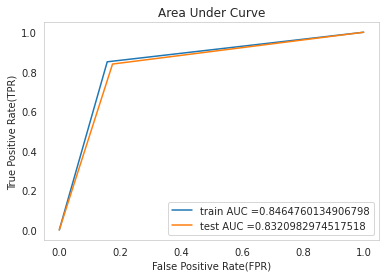

Actual state  Predicted state
60837              1                1
197422             0                0
31929              0                0
247742             0                0
58773              1                1

In [128]:
lgbm_best = cross_val.best_estimator_
lgbm_best.fit(X_train,y_train)

y_train_pred = lgbm_best.predict(X_train)
y_test_pred = lgbm_best.predict(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

#f1_score
f1_score_train = f1_score(y_train,y_train_pred)
f1_score_test = f1_score(y_test,y_test_pred)

print("="*50)
print("The F1_Score of Train: ",f1_score_train)
print("The F1_Score of Test: ",f1_score_test)
print("="*50)

print("="*50)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Area Under Curve")
plt.grid()
plt.show()
print("="*50)

d = pd.DataFrame({'Actual state': y_test, 'Predicted state': y_test_pred})
d.head(5)

# ExplainableAI

**SHAP (SHapley Additive exPlanations) Documentation** 

In [129]:
!pip install shap

     |████████████████████████████████| 356 kB 4.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491650 sha256=336085db4e976b0a0d02e91a55251ea427eb4f8c5453c9e6189a9886e9b01ccc
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [130]:
import shap
shap.initjs()

In [131]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model=lgbm_best)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

**SHAP Feature importance of X_train**

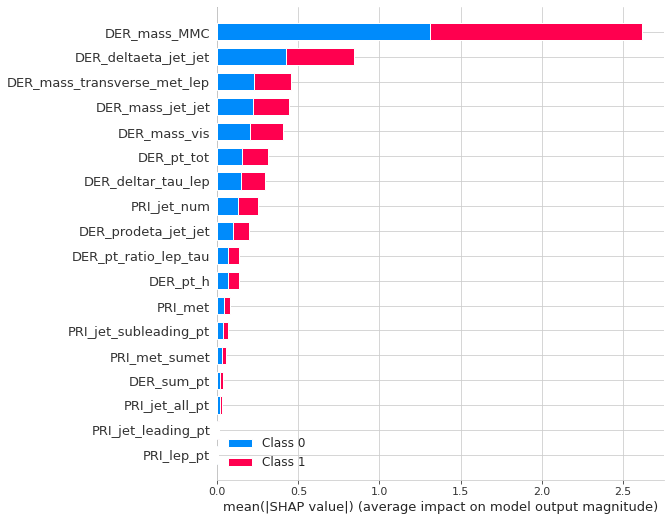

In [132]:
# SHAP Feature importance
shap.summary_plot(shap_values, X_train, feature_names=df.columns, plot_type="bar")

**SHAP Feature importance of X_test**

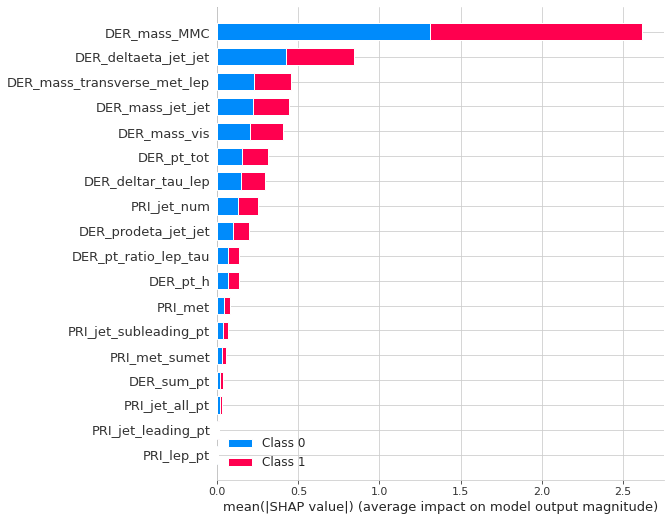

In [133]:
shap.summary_plot(shap_values, X_test, feature_names=df.columns, plot_type="bar")

**SHAP Dependence plot**

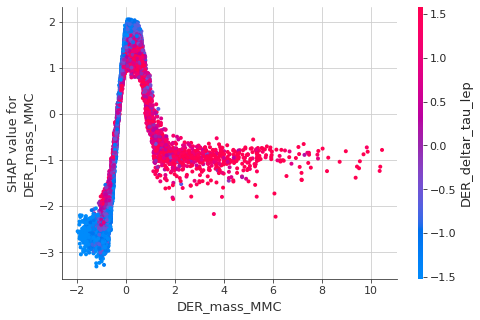

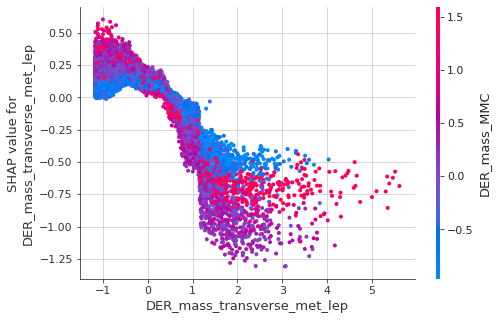

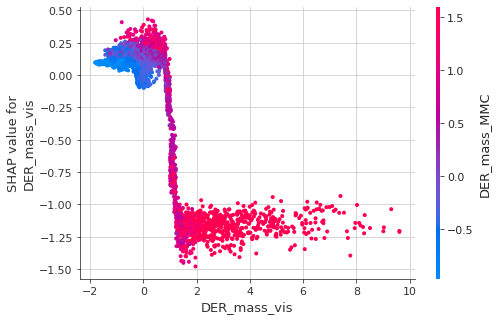

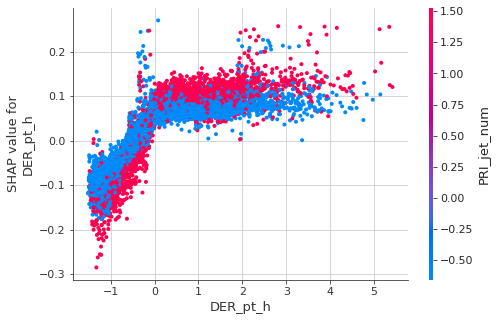

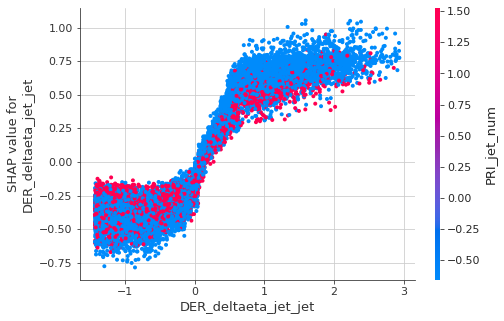

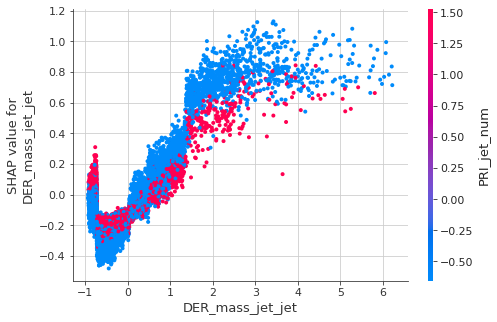

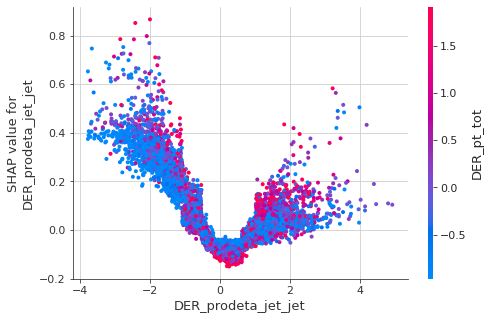

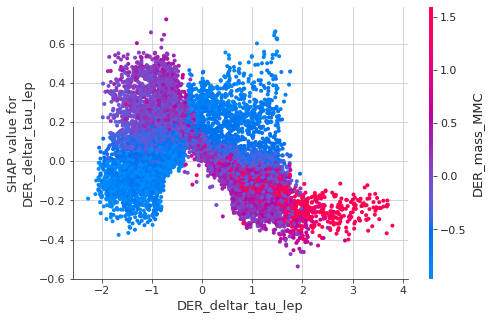

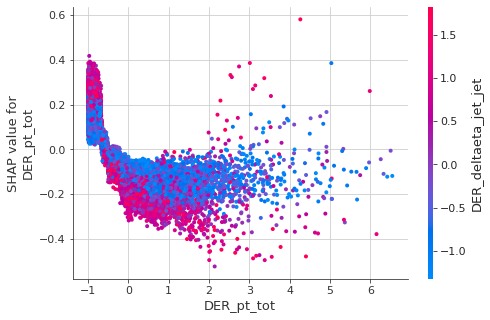

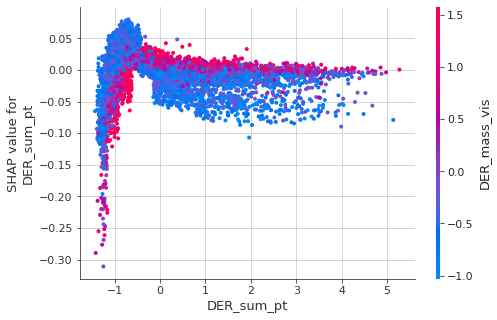

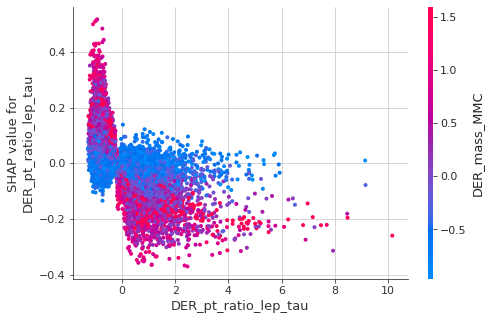

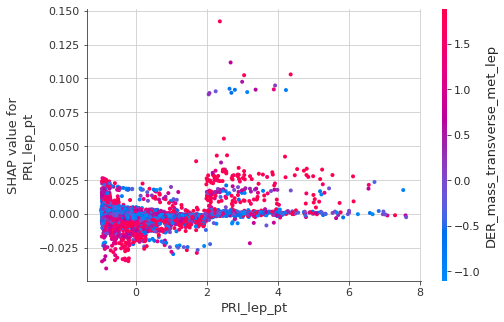

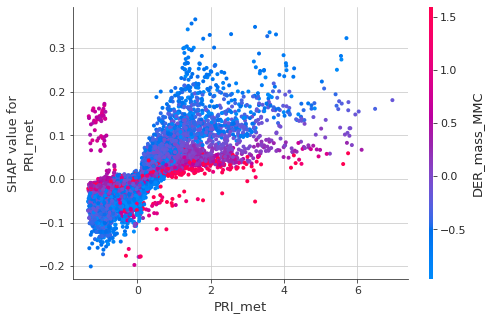

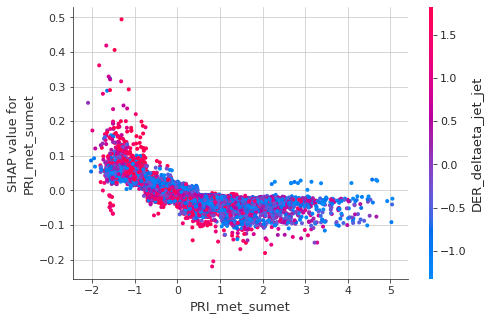

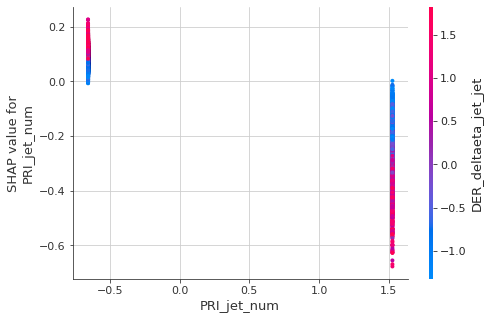

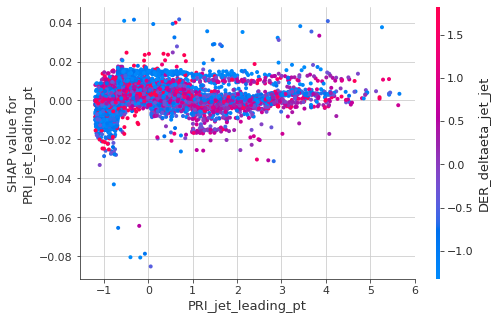

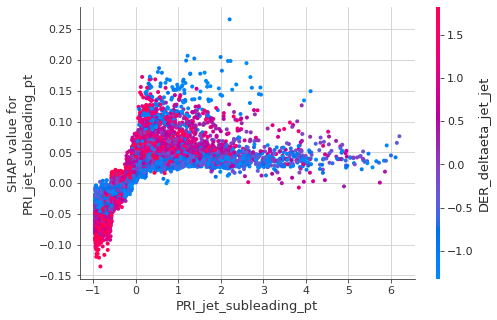

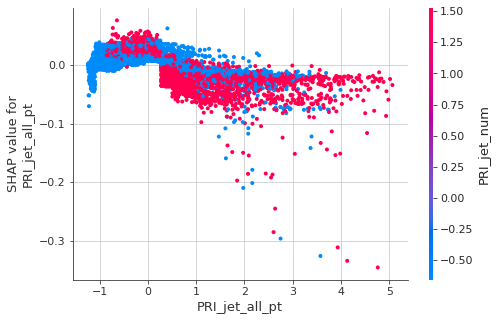

In [134]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X_test)